## 1. Lý thuyết về High-Utility Itemset Mining

### 1.1 Khái niệm cơ bản

**Utility** (giá trị/lợi ích) của một itemset trong một giao dịch được tính bằng:

$$U(X, T_k) = \sum_{x \in X} q(x, T_k) \times p(x)$$

Trong đó:
- $X$: Itemset (tập các sản phẩm)
- $T_k$: Giao dịch thứ k
- $q(x, T_k)$: Số lượng của item x trong giao dịch $T_k$ (internal utility)
- $p(x)$: Lợi nhuận/giá của item x (external utility)

**Tổng Utility** của itemset X trong toàn bộ database:

$$U(X) = \sum_{T_k \supseteq X} U(X, T_k)$$

### 1.2 Vấn đề với Downward Closure Property

Trong Frequent Pattern Mining, tính chất **Apriori** (downward closure) cho phép cắt tỉa hiệu quả:
- Nếu itemset X không phổ biến → tất cả superset của X cũng không phổ biến

**Nhưng với Utility**, tính chất này **KHÔNG** còn đúng:
- {A} có utility = 10
- {A, B} có thể có utility = 100 (do B có giá trị cao)

→ Cần sử dụng **Transaction-Weighted Utilization (TWU)** làm upper bound để cắt tỉa.

### 1.3 Transaction-Weighted Utilization (TWU)

$$TWU(X) = \sum_{T_k \supseteq X} TU(T_k)$$

Trong đó $TU(T_k)$ là tổng utility của giao dịch $T_k$.

**Tính chất quan trọng**: TWU có tính chất downward closure!
- Nếu $TWU(X) < minUtil$ → X và tất cả superset của X không phải High-Utility Itemset

## Parameters (for papermill)

In [1]:
# PARAMETERS (for papermill)

# ==================== ĐƯỜNG DẪN DỮ LIỆU ====================
CLEANED_DATA_PATH = "data/processed/cleaned_uk_data.csv"
OUTPUT_DIR = "data/processed"
HUI_OUTPUT_PATH = "data/processed/high_utility_itemsets.csv"

# ==================== THAM SỐ THỬ NGHIỆM ====================
# Ngưỡng utility cho thử nghiệm so sánh
TEST_THRESHOLDS = [0.1, 0.05]

# Tham số cũ (deprecated, chỉ để tương thích với papermill)
MIN_UTILITY_PERCENT = 0.1  
MIN_UTILITY_ABSOLUTE = 0  # Đặt > 0 nếu muốn dùng ngưỡng tuyệt đối

# Độ dài tối đa của itemset
MAX_ITEMSET_LENGTH = 2  # Có thể test với 3, 4

# ⏱️ TIMEOUT CONFIGURATION (giây)
# Timeout cho mỗi experiment, tự động tăng theo max_length
TIMEOUT_CONFIG = {
    1: 180,
    2: 300
}

# ==================== CỘT DỮ LIỆU ====================
INVOICE_COL = "InvoiceNo"
ITEM_COL = "Description"
QUANTITY_COL = "Quantity"
PRICE_COL = "UnitPrice"
TOTAL_COL = "TotalPrice"

# ==================== TÙY CHỌN HIỂN THỊ ====================
# Bật/tắt các biểu đồ
PLOT_TOP_HUI = True
PLOT_COMPARISON = True
PLOT_UTILITY_DISTRIBUTION = True

# Bật/tắt phân tích k-itemsets (3.1, 3.2)
RUN_ANALYSIS = True

# Số lượng top itemsets để hiển thị
TOP_N = 5

# ==================== MÀU SẮC CHỦ ĐẠO ====================
COLOR_BLUE = '#3498db'    # Xanh dương - cho Frequency/Volume
COLOR_GREEN = '#2ecc71'   # Xanh lá cây - cho Utility/Profit  
COLOR_ORANGE = '#e67e22'  # Cam - cho Highlights/Important
COLOR_GRAY = '#95a5a6'    # Xám - cho các mục khác
COLOR_RED = '#e74c3c'     # Đỏ - cho cảnh báo

# ==================== GỢI Ý TỐI ƯU ====================
# 💡 Để tăng tốc độ:
# - MIN_UTILITY_PERCENT: 0.001 (chậm) -> 0.005 (vừa) -> 0.01 (nhanh)
# - MAX_ITEMSET_LENGTH: 3 (chậm) -> 2 (nhanh) -> 1 (rất nhanh, chỉ single items)
# - TIMEOUT: Tăng nếu cần thời gian chạy lâu hơn
# 
# 🎯 Cấu hình khuyến nghị cho demo nhanh:
#    MIN_UTILITY_PERCENT=0.01, MAX_ITEMSET_LENGTH=2, TIMEOUT=600s

# #    TEST_THRESHOLDS=[0.1, 0.05, 0.025, 0.0125], MAX_ITEMSET_LENGTH=3, TIMEOUT=1800s
# 🔬 Cấu hình khuyến nghị cho nghiên cứu đầy đủ:

In [2]:
# Parameters
CLEANED_DATA_PATH = "E:\\dnu.khmt.1701.1771040029@gmail.com\\ShoppingCartAnalysis_FrequentPatternTree\\data\\processed\\cleaned_uk_data.csv"
OUTPUT_DIR = "E:\\dnu.khmt.1701.1771040029@gmail.com\\ShoppingCartAnalysis_FrequentPatternTree\\data\\processed"
HUI_OUTPUT_PATH = "E:\\dnu.khmt.1701.1771040029@gmail.com\\ShoppingCartAnalysis_FrequentPatternTree\\data\\processed\\high_utility_itemsets.csv"
MIN_UTILITY_PERCENT = 0.1
MIN_UTILITY_ABSOLUTE = 0
MAX_ITEMSET_LENGTH = 3
TEST_THRESHOLDS = [0.005, 0.001]
TIMEOUT_CONFIG = {"1": 180, "2": 240, "3": 300}
INVOICE_COL = "InvoiceNo"
ITEM_COL = "Description"
QUANTITY_COL = "Quantity"
PRICE_COL = "UnitPrice"
TOTAL_COL = "TotalPrice"
PLOT_TOP_HUI = True
PLOT_COMPARISON = True
PLOT_UTILITY_DISTRIBUTION = True
TOP_N = 5
RUN_ANALYSIS = True
COLOR_BLUE = "#3498db"
COLOR_GREEN = "#2ecc71"
COLOR_ORANGE = "#e67e22"
COLOR_GRAY = "#95a5a6"
COLOR_RED = "#e74c3c"


## 2. Set up

In [3]:
EXPERIMENT_TIMEOUT = TIMEOUT_CONFIG.get(str(MAX_ITEMSET_LENGTH), 60)

In [4]:
print("="*70)
print("📊 THAM SỐ THỬ NGHIỆM")
print("="*70)
print(f"Test thresholds: {[f'{t*100}%' for t in TEST_THRESHOLDS]}")
print(f"Max itemset length: {MAX_ITEMSET_LENGTH}")
print(f"⏱️ Timeout per experiment: {EXPERIMENT_TIMEOUT}s ({EXPERIMENT_TIMEOUT/60:.1f} minutes)")
print(f"💾 Data path: {CLEANED_DATA_PATH}")
print("="*70)

📊 THAM SỐ THỬ NGHIỆM
Test thresholds: ['0.5%', '0.1%']
Max itemset length: 3
⏱️ Timeout per experiment: 300s (5.0 minutes)
💾 Data path: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\data\processed\cleaned_uk_data.csv


In [5]:
%load_ext autoreload
%autoreload 2

import os
import sys
import time
import warnings
from collections import defaultdict
import itertools
from datetime import datetime
import traceback

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Xác định project_root linh hoạt
cwd = os.getcwd()
if os.path.basename(cwd) == "notebooks":
    project_root = os.path.abspath("../..")
elif "Lab_PhatTrien_5315" in cwd:
    project_root = os.path.abspath(os.path.join(cwd, "..", ".."))
else:
    project_root = cwd

src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

# Tạo output directory ngay từ đầu
LAB_OUTPUT_DIR = os.path.join(project_root, "Lab_PhatTrien_5315", "output")
os.makedirs(LAB_OUTPUT_DIR, exist_ok=True)

# Style cho biểu đồ
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# 3 MÀU CHỦ ĐẠO
COLOR_BLUE = '#3498db'    # Xanh dương - cho Frequency/Volume
COLOR_GREEN = '#2ecc71'   # Xanh lá cây - cho Utility/Profit  
COLOR_ORANGE = '#e67e22'  # Cam - cho Highlights/Important

# Màu phụ
COLOR_GRAY = '#95a5a6'
COLOR_RED = '#e74c3c'

print(f"Project root: {project_root}")
print(f"Output directory: {LAB_OUTPUT_DIR}")
print(f"\n🎨 Màu chủ đạo: Xanh dương ({COLOR_BLUE}), Xanh lá ({COLOR_GREEN}), Cam ({COLOR_ORANGE})")

Project root: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree
Output directory: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output

🎨 Màu chủ đạo: Xanh dương (#3498db), Xanh lá (#2ecc71), Cam (#e67e22)


### 2.1 Timeout và Logging Utilities

Định nghĩa các hàm tiện ích để:
- **Timeout protection**: Giới hạn thời gian chạy của các experiment để tránh treo hệ thống
- **Logging**: Ghi log với timestamp, màu sắc theo level, và lưu vào file

In [6]:
import threading
import functools

class TimeoutError(Exception):
    """Exception raised when a function exceeds time limit."""
    pass

def timeout_decorator(timeout_seconds):
    """
    Decorator để giới hạn thời gian chạy của function.
    
    Args:
        timeout_seconds: Thời gian tối đa (giây)
        
    Returns:
        Decorated function với timeout protection
        
    Raises:
        TimeoutError: Nếu function chạy quá timeout_seconds
    """
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            result = [TimeoutError(f'Function {func.__name__} exceeded {timeout_seconds}s timeout')]
            
            def target():
                try:
                    result[0] = func(*args, **kwargs)
                except Exception as e:
                    result[0] = e
            
            thread = threading.Thread(target=target)
            thread.daemon = True
            thread.start()
            thread.join(timeout_seconds)
            
            if thread.is_alive():
                # Thread vẫn chạy = timeout
                raise TimeoutError(f'Function {func.__name__} exceeded {timeout_seconds}s timeout')
            
            if isinstance(result[0], Exception):
                raise result[0]
            
            return result[0]
        
        return wrapper
    return decorator

def log_progress(message, level='INFO'):
    """
    Ghi log với timestamp và level.
    
    Args:
        message: Nội dung log
        level: Mức độ log (INFO, WARNING, ERROR, SUCCESS, TIMEOUT)
    """
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Màu sắc theo level
    colors = {
        'INFO': '\033[94m',      # Blue
        'SUCCESS': '\033[92m',   # Green
        'WARNING': '\033[93m',   # Yellow
        'ERROR': '\033[91m',     # Red
        'TIMEOUT': '\033[95m',   # Magenta
        'RESET': '\033[0m'
    }
    
    color = colors.get(level, colors['INFO'])
    reset = colors['RESET']
    
    log_msg = f"[{timestamp}][{level}] {message}"
    print(f"{color}{log_msg}{reset}")
    
    # Lưu vào file log
    log_file = os.path.join(LAB_OUTPUT_DIR, 'experiment_log.txt')
    with open(log_file, 'a', encoding='utf-8') as f:
        f.write(log_msg + '\n')
    
    return log_msg

# Test logging
log_progress("Logging system initialized", "SUCCESS")
log_progress("Timeout protection enabled", "SUCCESS")

[2025-12-23 08:04:05][SUCCESS] Logging system initialized
[2025-12-23 08:04:05][SUCCESS] Timeout protection enabled


'[2025-12-23 08:04:05][SUCCESS] Timeout protection enabled'

## 3. Tải và chuẩn bị dữ liệu

In [7]:
# Đọc dữ liệu đã làm sạch
data_path = os.path.join(project_root, CLEANED_DATA_PATH)
df = pd.read_csv(data_path, parse_dates=["InvoiceDate"])

print("=== Thông tin dữ liệu ===")
print(f"- Số giao dịch (dòng): {df.shape[0]:,}")
print(f"- Số cột: {df.shape[1]}")
print(f"- Số hoá đơn duy nhất: {df[INVOICE_COL].nunique():,}")
print(f"- Số sản phẩm duy nhất: {df[ITEM_COL].nunique():,}")

df.head()

=== Thông tin dữ liệu ===
- Số giao dịch (dòng): 485,123
- Số cột: 11
- Số hoá đơn duy nhất: 18,021
- Số sản phẩm duy nhất: 4,007


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     017850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     017850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     017850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     017850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     017850  United Kingdom       20.34   

   DayOfWeek  HourOfDay  
0          2          8  
1          2          8  
2          2          8  
3          2          8  
4          2          8

In [8]:
# Kiểm tra thông tin utility
print("=== Thống kê Utility (TotalPrice) ===")
print(df[TOTAL_COL].describe())

total_utility = df[TOTAL_COL].sum()
TOTAL_UTILITY = total_utility  # Define global constant for later use
print(f"\nTổng Utility (Doanh thu) của toàn bộ database: £{total_utility:,.2f}")

=== Thống kê Utility (TotalPrice) ===


count    485123.000000
mean         18.603987
std         281.280229
min           0.001000
25%           3.360000
50%           8.420000
75%          16.950000
max      168469.600000
Name: TotalPrice, dtype: float64

Tổng Utility (Doanh thu) của toàn bộ database: £9,025,222.08


### 3.1 Phân Tích Khả Năng Tạo K-Itemsets

Trước khi chạy khai thác, cần phân tích xem dữ liệu có khả năng tạo k-itemsets (2, 3, 4, 5, 6-itemsets) hay không. Điều này giúp:
- Chọn `MAX_ITEMSET_LENGTH` phù hợp
- Tránh lãng phí thời gian với k quá lớn
- Hiểu cấu trúc giao dịch trong dataset

In [9]:
if RUN_ANALYSIS:
    # Phân tích độ dài giao dịch
    print("="*80)
    print("📊 PHÂN TÍCH ĐỘ DÀI GIAO DỊCH VÀ KHẢ NĂNG TẠO K-ITEMSETS")
    print("="*80)

    # Tính số lượng items trong mỗi hóa đơn
    items_per_invoice = df.groupby(INVOICE_COL)[ITEM_COL].count()

    print("\n📈 Thống kê số lượng items/hóa đơn:")
    print(items_per_invoice.describe().to_string())

    # Phân tích khả năng tạo k-itemsets
    print("\n🔍 Khả năng tạo k-itemsets từ dữ liệu:")
    print("-"*80)

    k_itemset_stats = []
    max_k_to_check = 5

    for k in range(2, max_k_to_check + 1):
        # Số hóa đơn có >= k items (có thể tạo k-itemset)
        invoices_with_k = (items_per_invoice >= k).sum()
        percent = invoices_with_k / len(items_per_invoice) * 100
        
        # Tính số lượng k-itemsets có thể có (ước tính)
        avg_items_qualified = items_per_invoice[items_per_invoice >= k].mean() if invoices_with_k > 0 else 0
        
        # Số combinations có thể từ 1 invoice với n items: C(n,k)
        if avg_items_qualified >= k and k <= 7:  # Giới hạn tính toán
            from math import comb
            avg_combinations = comb(int(avg_items_qualified), k) if avg_items_qualified >= k else 0
            total_possible = avg_combinations * invoices_with_k
        else:
            total_possible = 0
        
        stat = {
            'k': k,
            'invoices_count': invoices_with_k,
            'invoices_percent': percent,
            'avg_items': avg_items_qualified,
            'est_combinations': total_possible
        }
        k_itemset_stats.append(stat)
        
        # In kết quả
        status_icon = "✅" if percent >= 70 else ("⚠️" if percent >= 50 else "🔴")
        print(f"{status_icon} {k}-itemsets: {invoices_with_k:,} hóa đơn ({percent:.1f}%) có thể tạo")
        
        # Cảnh báo nếu quá ít
        if percent < 50:
            print(f"   ⚠️ Chỉ {percent:.1f}% hóa đơn có thể tạo {k}-itemsets")
        if percent < 10:
            print(f"   🔴 KHÔNG NÊN dùng MAX_ITEMSET_LENGTH={k} (quá ít dữ liệu)")

    # Tạo DataFrame để visualize
    df_k_stats = pd.DataFrame(k_itemset_stats)

    print("\n" + "="*80)
    print("💡 KHUYẾN NGHỊ CHO MAX_ITEMSET_LENGTH:")
    print("="*80)

    # Tìm k tối ưu (>= 70% hóa đơn có thể tạo)
    optimal_k_candidates = df_k_stats[df_k_stats['invoices_percent'] >= 70]['k']
    optimal_k = optimal_k_candidates.max() if len(optimal_k_candidates) > 0 else 2
    practical_k = min(optimal_k, 4)  # Giới hạn thực tế là 4

    print(f"✅ Giá trị tối ưu: MAX_ITEMSET_LENGTH = {practical_k}")
    current_k_row = df_k_stats[df_k_stats['k']==practical_k].iloc[0]
    print(f"   - {current_k_row['invoices_percent']:.1f}% hóa đơn có thể tạo {practical_k}-itemsets")
    print(f"   - Cân bằng tốt giữa coverage và performance")

    if MAX_ITEMSET_LENGTH > practical_k:
        print(f"\n⚠️ Cảnh báo: MAX_ITEMSET_LENGTH hiện tại ({MAX_ITEMSET_LENGTH}) > khuyến nghị ({practical_k})")
        print(f"   → Có thể chạy lâu mà không tìm thêm nhiều patterns hữu ích")
    elif MAX_ITEMSET_LENGTH < practical_k:
        print(f"\n💡 Gợi ý: Có thể tăng MAX_ITEMSET_LENGTH lên {practical_k} để tìm thêm patterns")
    else:
        print(f"\n✅ MAX_ITEMSET_LENGTH hiện tại ({MAX_ITEMSET_LENGTH}) phù hợp!")

else:
    print("⏭️ Bỏ qua phân tích 3.1 (RUN_ANALYSIS=False)")

📊 PHÂN TÍCH ĐỘ DÀI GIAO DỊCH VÀ KHẢ NĂNG TẠO K-ITEMSETS

📈 Thống kê số lượng items/hóa đơn:
count    18021.000000
mean        26.919871
std         49.462298
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1114.000000

🔍 Khả năng tạo k-itemsets từ dữ liệu:
--------------------------------------------------------------------------------
✅ 2-itemsets: 16,534 hóa đơn (91.7%) có thể tạo
✅ 3-itemsets: 15,755 hóa đơn (87.4%) có thể tạo
✅ 4-itemsets: 15,101 hóa đơn (83.8%) có thể tạo
✅ 5-itemsets: 14,496 hóa đơn (80.4%) có thể tạo

💡 KHUYẾN NGHỊ CHO MAX_ITEMSET_LENGTH:
✅ Giá trị tối ưu: MAX_ITEMSET_LENGTH = 4
   - 83.8% hóa đơn có thể tạo 4-itemsets
   - Cân bằng tốt giữa coverage và performance

💡 Gợi ý: Có thể tăng MAX_ITEMSET_LENGTH lên 4 để tìm thêm patterns


✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\3.1 Phan Tich Kha Nang Tao K-Itemsets.png


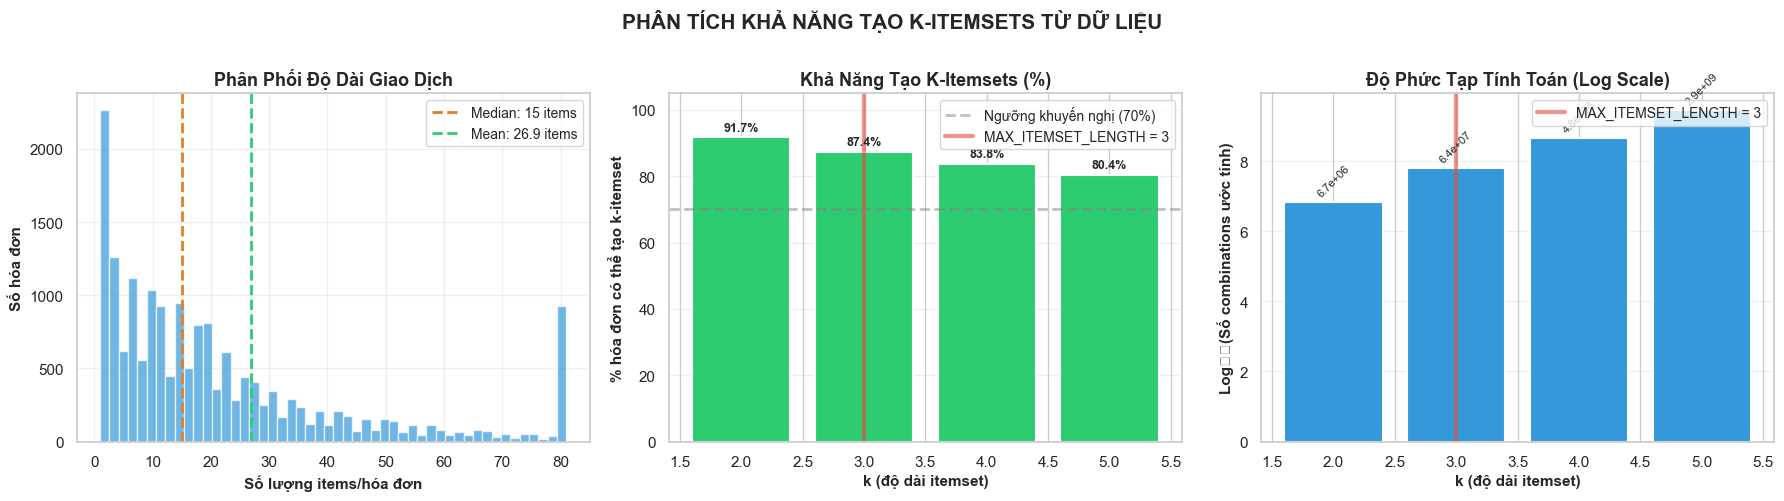

In [10]:
if RUN_ANALYSIS:
    # Visualization: Biểu đồ phân tích k-itemsets
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot 1: Histogram độ dài giao dịch
    ax1 = axes[0]
    items_per_invoice_clipped = items_per_invoice.clip(upper=items_per_invoice.quantile(0.95))
    ax1.hist(items_per_invoice_clipped, bins=50, color=COLOR_BLUE, edgecolor='white', alpha=0.7)
    ax1.axvline(items_per_invoice.median(), color=COLOR_ORANGE, linestyle='--', linewidth=2, 
                label=f'Median: {items_per_invoice.median():.0f} items')
    ax1.axvline(items_per_invoice.mean(), color=COLOR_GREEN, linestyle='--', linewidth=2,
                label=f'Mean: {items_per_invoice.mean():.1f} items')
    ax1.set_xlabel('Số lượng items/hóa đơn', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Số hóa đơn', fontsize=11, fontweight='bold')
    ax1.set_title('Phân Phối Độ Dài Giao Dịch', fontsize=13, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Plot 2: % hóa đơn có thể tạo k-itemsets
    ax2 = axes[1]
    k_values = df_k_stats['k'].values[:8]  # Hiển thị đến 9-itemsets
    percentages = df_k_stats['invoices_percent'].values[:8]

    bars = ax2.bar(k_values, percentages, color=COLOR_GREEN, edgecolor='white', linewidth=1.5)
    # Tô màu khác cho các bar < 50%
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        if pct < 70:
            bar.set_color(COLOR_ORANGE)
        if pct < 50:
            bar.set_color(COLOR_RED)
        # Thêm label
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{pct:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax2.axhline(y=70, color='gray', linestyle='--', alpha=0.5, linewidth=2, label='Ngưỡng khuyến nghị (70%)')
    ax2.set_xlabel('k (độ dài itemset)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('% hóa đơn có thể tạo k-itemset', fontsize=11, fontweight='bold')
    ax2.set_title('Khả Năng Tạo K-Itemsets (%)', fontsize=13, fontweight='bold')
    ax2.set_ylim(0, 105)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')

    # Plot 3: Số lượng combinations ước tính (log scale)
    ax3 = axes[2]
    k_values_calc = df_k_stats[df_k_stats['est_combinations'] > 0]['k'].values
    combinations = df_k_stats[df_k_stats['est_combinations'] > 0]['est_combinations'].values

    if len(combinations) > 0:
        combinations_log = np.log10(combinations)
        bars3 = ax3.bar(k_values_calc, combinations_log, color=COLOR_BLUE, edgecolor='white', linewidth=1.5)
        
        # Thêm annotation
        for bar, k, comb in zip(bars3, k_values_calc, combinations):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                    f'{comb:.1e}', ha='center', va='bottom', fontsize=8, rotation=45)
        
        ax3.set_xlabel('k (độ dài itemset)', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Log₁₀(Số combinations ước tính)', fontsize=11, fontweight='bold')
        ax3.set_title('Độ Phức Tạp Tính Toán (Log Scale)', fontsize=13, fontweight='bold')
        ax3.grid(True, alpha=0.3, axis='y')

    # Thêm annotation cho MAX_ITEMSET_LENGTH hiện tại
    for ax in [ax2, ax3]:
        ax.axvline(x=MAX_ITEMSET_LENGTH, color=COLOR_RED, linestyle='-', linewidth=3, alpha=0.6,
                   label=f'MAX_ITEMSET_LENGTH = {MAX_ITEMSET_LENGTH}')
        ax.legend(fontsize=10)

    plt.suptitle('PHÂN TÍCH KHẢ NĂNG TẠO K-ITEMSETS TỪ DỮ LIỆU', 
                 fontsize=15, fontweight='bold', y=1.00)
    plt.tight_layout()

    # Lưu biểu đồ
    chart_path = os.path.join(LAB_OUTPUT_DIR, '3.1 Phan Tich Kha Nang Tao K-Itemsets.png')
    plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
    print(f"✅ Đã lưu biểu đồ: {chart_path}")
    plt.show()

In [11]:
if RUN_ANALYSIS:
    # Phân tích chi tiết cho MAX_ITEMSET_LENGTH hiện tại
    print("\n" + "="*80)
    print(f"📋 PHÂN TÍCH CHI TIẾT CHO MAX_ITEMSET_LENGTH = {MAX_ITEMSET_LENGTH}")
    print("="*80)

    # Lấy thông tin cho k hiện tại
    current_k_info = df_k_stats[df_k_stats['k'] == MAX_ITEMSET_LENGTH].iloc[0]

    print(f"\n✅ Với MAX_ITEMSET_LENGTH = {MAX_ITEMSET_LENGTH}:")
    print(f"   • {current_k_info['invoices_count']:,} hóa đơn ({current_k_info['invoices_percent']:.1f}%) có thể tạo {MAX_ITEMSET_LENGTH}-itemsets")
    print(f"   • Trung bình {current_k_info['avg_items']:.1f} items trong các hóa đơn đủ điều kiện")

    # Đánh giá coverage
    if current_k_info['invoices_percent'] >= 80:
        print(f"   • ✅ RẤT TỐT - coverage cao ({current_k_info['invoices_percent']:.1f}% ≥ 80%)")
    elif current_k_info['invoices_percent'] >= 70:
        print(f"   • ✅ TỐT - coverage tốt ({current_k_info['invoices_percent']:.1f}% ≥ 70%)")
    elif current_k_info['invoices_percent'] >= 50:
        print(f"   • ⚠️ CHẤP NHẬN ĐƯỢC - coverage trung bình ({current_k_info['invoices_percent']:.1f}%)")
    else:
        print(f"   • 🔴 KHÔNG TỐI ƯU - coverage thấp ({current_k_info['invoices_percent']:.1f}% < 50%)")

    # Ước tính thời gian chạy
    if MAX_ITEMSET_LENGTH <= 2:
        print(f"   • ⚡ Tốc độ: NHANH ({MAX_ITEMSET_LENGTH}-itemsets - vài phút)")
    elif MAX_ITEMSET_LENGTH == 3:
        print(f"   • ⏱️ Tốc độ: TRUNG BÌNH ({MAX_ITEMSET_LENGTH}-itemsets - 10-30 phút)")
    elif MAX_ITEMSET_LENGTH == 4:
        print(f"   • 🐌 Tốc độ: CHẬM ({MAX_ITEMSET_LENGTH}-itemsets - 30-60 phút)")
    else:
        print(f"   • 🐢 Tốc độ: RẤT CHẬM ({MAX_ITEMSET_LENGTH}-itemsets - có thể > 1 giờ)")

    # Thống kê tổng quan
    print("\n📊 Tổng quan coverage cho các k-itemsets:")
    print("-"*80)
    for idx, row in df_k_stats.head(6).iterrows():
        k = int(row['k'])
        pct = row['invoices_percent']
        status = "✅" if pct >= 70 else ("⚠️" if pct >= 50 else "🔴")
        marker = " ← Hiện tại" if k == MAX_ITEMSET_LENGTH else ""
        print(f"{status} {k}-itemsets: {pct:5.1f}% coverage{marker}")

    print("\n" + "="*80)


📋 PHÂN TÍCH CHI TIẾT CHO MAX_ITEMSET_LENGTH = 3

✅ Với MAX_ITEMSET_LENGTH = 3:
   • 15,755.0 hóa đơn (87.4%) có thể tạo 3-itemsets
   • Trung bình 30.6 items trong các hóa đơn đủ điều kiện
   • ✅ RẤT TỐT - coverage cao (87.4% ≥ 80%)
   • ⏱️ Tốc độ: TRUNG BÌNH (3-itemsets - 10-30 phút)

📊 Tổng quan coverage cho các k-itemsets:
--------------------------------------------------------------------------------
✅ 2-itemsets:  91.7% coverage
✅ 3-itemsets:  87.4% coverage ← Hiện tại
✅ 4-itemsets:  83.8% coverage
✅ 5-itemsets:  80.4% coverage



### 3.2 Phân Tích Phân Bố Utility của K-Itemsets

Để điều chỉnh `MIN_UTILITY_PERCENT` và `TEST_THRESHOLDS` một cách hiệu quả, ta cần hiểu phân bố utility của các k-itemsets có thể tạo ra từ dữ liệu.

**Mục tiêu:**
- Tính utility trung bình, median, percentiles cho từng loại k-itemset (k=2→5)
- Xác định tỷ lệ itemsets có utility ≥ MIN_UTILITY_THRESHOLD
- Trực quan hóa phân bố để tìm threshold tối ưu tránh timeout

In [12]:
%%time
if not RUN_ANALYSIS:
    print("⏭️ Bỏ qua phân tích 3.2 (RUN_ANALYSIS=False)")
else:
    # Phân tích utility distribution cho k-itemsets
    import itertools
    from collections import defaultdict
    import numpy as np

    # Configuration
    max_k_to_check = 3
    sample_ratio = 0.1e-2
    np.random.seed(42)

    print("="*80)
    print("🔍 PHÂN TÍCH PHÂN BỐ UTILITY CỦA K-ITEMSETS")
    print("="*80)
    print(f"📊 Dữ liệu: {len(df)} rows, {df[INVOICE_COL].nunique()} invoices")
    print(f"📦 Phạm vi: 2-itemsets → {max_k_to_check}-itemsets")
    print(f"🎲 Sample ratio: {sample_ratio*100:.0f}% invoices")
    print("="*80)

    # Tính utility cho từng invoice
    invoice_items = df.groupby(INVOICE_COL).apply(
        lambda x: list(zip(x[ITEM_COL], x[TOTAL_COL]))
    ).to_dict()

    # Sample invoices để giảm thời gian tính toán
    all_invoices = list(invoice_items.keys())
    sample_size = max(100, int(len(all_invoices) * sample_ratio))
    sample_indices = np.random.choice(len(all_invoices), size=sample_size, replace=False)
    sampled_invoices = [all_invoices[i] for i in sample_indices]  # Giữ nguyên kiểu dữ liệu gốc

    print(f"\n✅ Đã sample {len(sampled_invoices):,} / {len(all_invoices):,} invoices")

    # Dictionary để lưu utility của mỗi k-itemset
    k_itemsets_utilities = defaultdict(list)

    print("\n⏳ Đang tính utility cho từng k-itemset...")
    for idx, invoice_id in enumerate(sampled_invoices, 1):
        if idx % 50 == 0:
            print(f"   Processing invoice {idx}/{len(sampled_invoices)}...", end='\r')
        
        items_with_utility = invoice_items[invoice_id]
        items = [item for item, _ in items_with_utility]
        utility_map = {item: utility for item, utility in items_with_utility}
        
        # Tính utility cho mỗi k
        for k in range(2, min(max_k_to_check + 1, len(items) + 1)):
            for combo in itertools.combinations(items, k):
                total_utility = sum(utility_map[item] for item in combo)
                k_itemsets_utilities[k].append(total_utility)

    print(f"\n✅ Hoàn thành phân tích {len(sampled_invoices):,} invoices")

    # Tính thống kê cho mỗi k
    stats_summary = []

    print("\n" + "="*80)
    print("📈 THỐNG KÊ UTILITY THEO K-ITEMSETS (ĐỂ CHỌN THRESHOLD PHÙ HỢP)")
    print("="*80)
    print("💡 Sử dụng các percentiles dưới đây để chọn MIN_UTILITY_PERCENT hợp lý")
    print("="*80)

    for k in range(2, max_k_to_check + 1):
        utilities = k_itemsets_utilities[k]
        if len(utilities) == 0:
            print(f"\n⚠️ {k}-itemsets: Không có dữ liệu")
            continue
        
        utilities_arr = np.array(utilities)
        
        # Tính các percentiles
        p25, p50, p75, p90, p95, p99 = np.percentile(utilities_arr, [25, 50, 75, 90, 95, 99])
        
        stats_summary.append({
            'k': k,
            'count': len(utilities_arr),
            'mean': utilities_arr.mean(),
            'median': p50,
            'std': utilities_arr.std(),
            'min': utilities_arr.min(),
            'max': utilities_arr.max(),
            'p25': p25,
            'p75': p75,
            'p90': p90,
            'p95': p95,
            'p99': p99,
            # Tính % của max để gợi ý threshold
            'p99_percent_of_total': (p99 / TOTAL_UTILITY) * 100,
            'max_percent_of_total': (utilities_arr.max() / TOTAL_UTILITY) * 100
        })
        
        print(f"\n{'─'*80}")
        print(f"🔹 {k}-ITEMSETS")
        print(f"{'─'*80}")
        print(f"  📊 Tổng số: {len(utilities_arr):,} itemsets")
        print(f"  📈 Trung bình: £{utilities_arr.mean():,.2f}")
        print(f"  📊 Median: £{p50:,.2f}")
        print(f"  📏 Std Dev: £{utilities_arr.std():,.2f}")
        print(f"  🔽 Min: £{utilities_arr.min():,.2f}")
        print(f"  🔼 Max: £{utilities_arr.max():,.2f}")
        print(f"\n  📊 Percentiles:")
        print(f"     25%: £{p25:,.2f}")
        print(f"     50%: £{p50:,.2f}")
        print(f"     75%: £{p75:,.2f}")
        print(f"     90%: £{p90:,.2f}")
        print(f"     95%: £{p95:,.2f}")
        print(f"     99%: £{p99:,.2f}")

        
        # Gợi ý threshold dựa trên percentiles
        p99_pct = (p99 / TOTAL_UTILITY) * 100
        max_pct = (utilities_arr.max() / TOTAL_UTILITY) * 100
        print(f"\n  💡 GỢI Ý THRESHOLD (dựa trên TOTAL_UTILITY = £{TOTAL_UTILITY:,.0f}):")
        print(f"     P99 = {p99_pct:.6f}% của total → MIN_UTILITY_PERCENT ≥ {p99_pct:.4f}% để lọc top 1%")
        print(f"     Max = {max_pct:.6f}% của total → Utility cao nhất trong 1 transaction")

    # Convert to DataFrame
    df_stats = pd.DataFrame(stats_summary)
    print("\n" + "="*80)
    print("✅ Hoàn thành phân tích utility distribution")
    print("="*80)

🔍 PHÂN TÍCH PHÂN BỐ UTILITY CỦA K-ITEMSETS


📊 Dữ liệu: 485123 rows, 18021 invoices
📦 Phạm vi: 2-itemsets → 3-itemsets
🎲 Sample ratio: 0% invoices



✅ Đã sample 100 / 18,021 invoices

⏳ Đang tính utility cho từng k-itemset...


   Processing invoice 100/100...
✅ Hoàn thành phân tích 100 invoices

📈 THỐNG KÊ UTILITY THEO K-ITEMSETS (ĐỂ CHỌN THRESHOLD PHÙ HỢP)
💡 Sử dụng các percentiles dưới đây để chọn MIN_UTILITY_PERCENT hợp lý

────────────────────────────────────────────────────────────────────────────────
🔹 2-ITEMSETS
────────────────────────────────────────────────────────────────────────────────
  📊 Tổng số: 127,785 itemsets
  📈 Trung bình: £33.18
  📊 Median: £12.42
  📏 Std Dev: £94.19
  🔽 Min: £0.58
  🔼 Max: £3,029.76

  📊 Percentiles:
     25%: £7.39
     50%: £12.42
     75%: £25.75
     90%: £50.26
     95%: £110.11
     99%: £427.12

  💡 GỢI Ý THRESHOLD (dựa trên TOTAL_UTILITY = £9,025,222):
     P99 = 0.004733% của total → MIN_UTILITY_PERCENT ≥ 0.0047% để lọc top 1%
     Max = 0.033570% của total → Utility cao nhất trong 1 transaction



────────────────────────────────────────────────────────────────────────────────
🔹 3-ITEMSETS
────────────────────────────────────────────────────────────────────────────────
  📊 Tổng số: 7,207,814 itemsets
  📈 Trung bình: £41.20
  📊 Median: £18.13
  📏 Std Dev: £102.64
  🔽 Min: £0.97
  🔼 Max: £4,139.76

  📊 Percentiles:
     25%: £11.55
     50%: £18.13
     75%: £31.41
     90%: £58.42
     95%: £153.67
     99%: £510.13

  💡 GỢI Ý THRESHOLD (dựa trên TOTAL_UTILITY = £9,025,222):
     P99 = 0.005652% của total → MIN_UTILITY_PERCENT ≥ 0.0057% để lọc top 1%
     Max = 0.045869% của total → Utility cao nhất trong 1 transaction

✅ Hoàn thành phân tích utility distribution
CPU times: total: 11.5 s
Wall time: 11.5 s


✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\3.2 Phan Bo Utility cua K-Itemsets.png


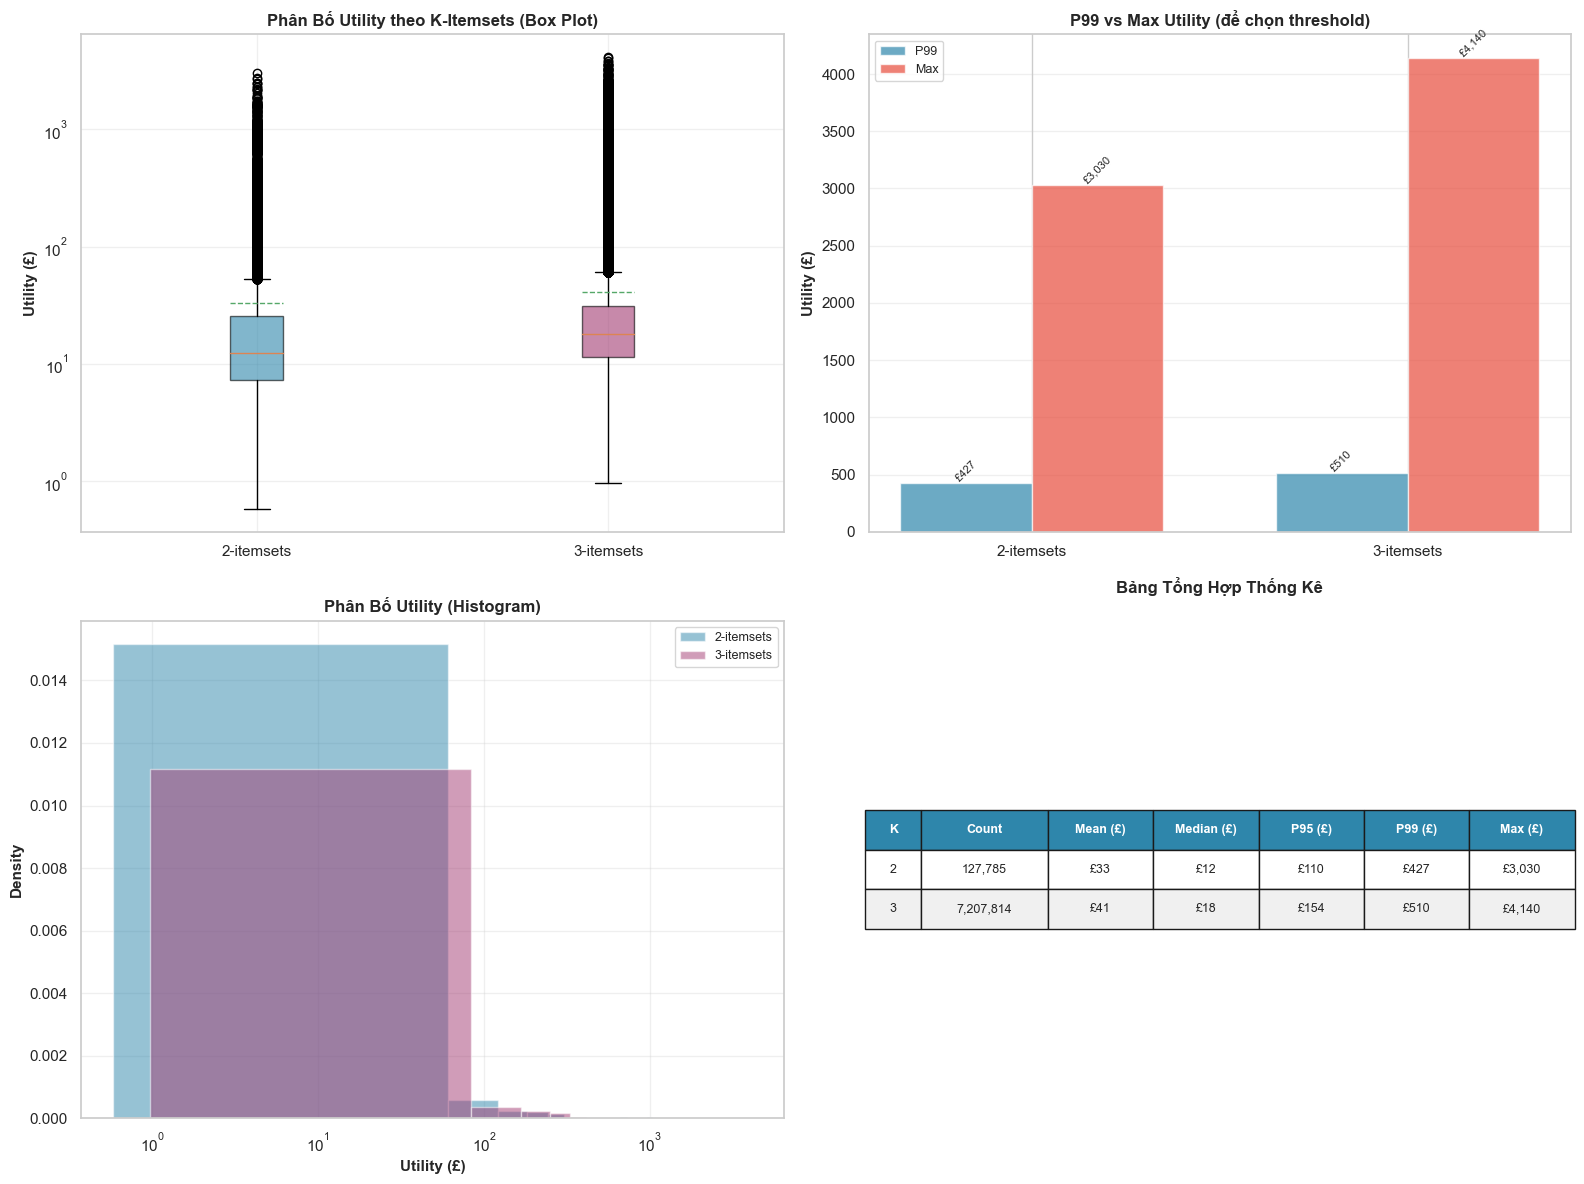

In [13]:
if not RUN_ANALYSIS:
    print("⏭️ Bỏ qua visualization 3.2 (RUN_ANALYSIS=False)")
else:
    # Visualization: Phân bố utility theo k-itemsets
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

    # 1. Box plot - So sánh phân bố utility
    ax1 = axes[0, 0]
    box_data = [k_itemsets_utilities[k] for k in range(2, max_k_to_check + 1)]
    bp = ax1.boxplot(box_data, labels=[f"{k}-itemsets" for k in range(2, max_k_to_check + 1)],
                      patch_artist=True, showmeans=True, meanline=True)

    # Tô màu cho boxes
    for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)

    ax1.set_ylabel('Utility (£)', fontsize=11, fontweight='bold')
    ax1.set_title('Phân Bố Utility theo K-Itemsets (Box Plot)', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')  # Log scale để dễ nhìn

    # 2. Bar chart - So sánh P99 và Max utility theo k
    ax2 = axes[0, 1]
    x_pos = np.arange(len(df_stats))
    bar_width = 0.35

    bars1 = ax2.bar(x_pos - bar_width/2, df_stats['p99'], bar_width, color='#2E86AB', alpha=0.7, label='P99')
    bars2 = ax2.bar(x_pos + bar_width/2, df_stats['max'], bar_width, color='#E74C3C', alpha=0.7, label='Max')

    # Thêm labels
    for i, (idx, row) in enumerate(df_stats.iterrows()):
        ax2.text(i - bar_width/2, row['p99'], f"£{row['p99']:,.0f}", ha='center', va='bottom', fontsize=8, rotation=45)
        ax2.text(i + bar_width/2, row['max'], f"£{row['max']:,.0f}", ha='center', va='bottom', fontsize=8, rotation=45)

    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([f"{int(row['k'])}-itemsets" for _, row in df_stats.iterrows()])
    ax2.set_ylabel('Utility (£)', fontsize=11, fontweight='bold')
    ax2.set_title('P99 vs Max Utility (để chọn threshold)', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y')

    # 3. Histogram - Phân bố utility cho từng k
    ax3 = axes[1, 0]
    for k, color in zip(range(2, max_k_to_check + 1), colors):
        utilities = k_itemsets_utilities[k]
        if len(utilities) > 0:
            ax3.hist(utilities, bins=50, alpha=0.5, color=color, label=f'{k}-itemsets', density=True)

    ax3.set_xlabel('Utility (£)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Density', fontsize=11, fontweight='bold')
    ax3.set_title('Phân Bố Utility (Histogram)', fontsize=12, fontweight='bold')
    ax3.set_xscale('log')
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3)

    # 4. Summary statistics table
    ax4 = axes[1, 1]
    ax4.axis('tight')
    ax4.axis('off')

    # Tạo table data - thống kê thuần túy
    table_data = []
    table_data.append(['K', 'Count', 'Mean (£)', 'Median (£)', 'P95 (£)', 'P99 (£)', 'Max (£)'])
    for _, row in df_stats.iterrows():
        table_data.append([
            f"{int(row['k'])}",
            f"{int(row['count']):,}",
            f"£{row['mean']:,.0f}",
            f"£{row['median']:,.0f}",
            f"£{row['p95']:,.0f}",
            f"£{row['p99']:,.0f}",
            f"£{row['max']:,.0f}"
        ])

    table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                      colWidths=[0.08, 0.18, 0.15, 0.15, 0.15, 0.15, 0.15])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)

    # Style header row
    for i in range(len(table_data[0])):
        cell = table[(0, i)]
        cell.set_facecolor('#2E86AB')
        cell.set_text_props(weight='bold', color='white')

    # Alternate row colors
    for i in range(1, len(table_data)):
        for j in range(len(table_data[0])):
            cell = table[(i, j)]
            if i % 2 == 0:
                cell.set_facecolor('#f0f0f0')

    ax4.set_title('Bảng Tổng Hợp Thống Kê', fontsize=12, fontweight='bold', pad=20)

    plt.tight_layout()

    # Lưu biểu đồ
    chart_path = os.path.join(LAB_OUTPUT_DIR, '3.2 Phan Bo Utility cua K-Itemsets.png')
    plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
    print(f"✅ Đã lưu biểu đồ: {chart_path}")
    plt.show()

✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\3.2 CDF va Khuyen Nghi Threshold.png


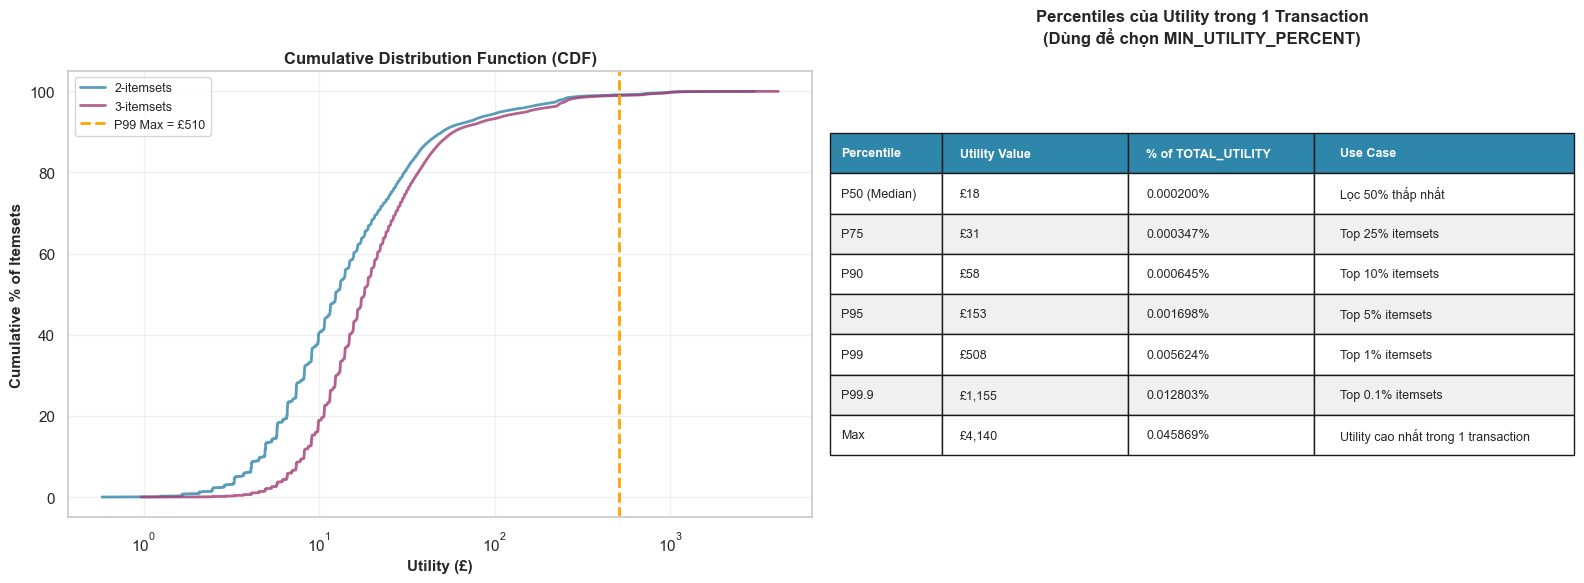

✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\3.2 CDF va Khuyen Nghi Threshold.png


In [14]:
if not RUN_ANALYSIS:
    print("⏭️ Bỏ qua CDF visualization (RUN_ANALYSIS=False)")
else:
    # Cumulative Distribution Function (CDF) để tìm threshold tối ưu
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # 1. CDF cho từng k-itemset
    ax1 = axes[0]
    for k, color in zip(range(2, max_k_to_check + 1), colors):
        utilities = np.sort(k_itemsets_utilities[k])
        if len(utilities) > 0:
            cdf = np.arange(1, len(utilities) + 1) / len(utilities) * 100
            ax1.plot(utilities, cdf, color=color, linewidth=2, label=f'{k}-itemsets', alpha=0.8)

    # Thêm các đường percentile reference
    p99_max = df_stats['p99'].max()
    ax1.axvline(x=p99_max, color='orange', linestyle='--', linewidth=2, 
                label=f'P99 Max = £{p99_max:,.0f}')

    ax1.set_xlabel('Utility (£)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Cumulative % of Itemsets', fontsize=11, fontweight='bold')
    ax1.set_title('Cumulative Distribution Function (CDF)', fontsize=12, fontweight='bold')
    ax1.set_xscale('log')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)

    # 2. Đề xuất thresholds dựa trên percentiles của DATA (không phải MIN_UTILITY)
    ax2 = axes[1]
    ax2.axis('tight')
    ax2.axis('off')

    # Tạo bảng đề xuất thresholds dựa trên DATA PERCENTILES
    threshold_suggestions = []
    threshold_suggestions.append(['Percentile', 'Utility Value', '% of TOTAL_UTILITY', 'Use Case'])

    # Tính percentiles từ tất cả utilities
    all_utilities = []
    for k in range(2, max_k_to_check + 1):
        all_utilities.extend(k_itemsets_utilities[k])
    all_utilities = np.array(all_utilities)

    # Các mức percentile để gợi ý
    percentile_levels = [
        (50, 'P50 (Median)', 'Lọc 50% thấp nhất'),
        (75, 'P75', 'Top 25% itemsets'),
        (90, 'P90', 'Top 10% itemsets'),
        (95, 'P95', 'Top 5% itemsets'),
        (99, 'P99', 'Top 1% itemsets'),
        (99.9, 'P99.9', 'Top 0.1% itemsets'),
    ]

    for pct_level, pct_name, use_case in percentile_levels:
        threshold_value = np.percentile(all_utilities, pct_level)
        pct_of_total = (threshold_value / TOTAL_UTILITY) * 100
        
        threshold_suggestions.append([
            pct_name,
            f"£{threshold_value:,.0f}",
            f"{pct_of_total:.6f}%",
            use_case
        ])

    # Thêm dòng cho Max
    max_util = all_utilities.max()
    max_pct = (max_util / TOTAL_UTILITY) * 100
    threshold_suggestions.append([
        'Max',
        f"£{max_util:,.0f}",
        f"{max_pct:.6f}%",
        'Utility cao nhất trong 1 transaction'
    ])

    table = ax2.table(cellText=threshold_suggestions, cellLoc='left', loc='center',
                      colWidths=[0.15, 0.25, 0.25, 0.35])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2.5)

    # Style header
    for i in range(len(threshold_suggestions[0])):
        cell = table[(0, i)]
        cell.set_facecolor('#2E86AB')
        cell.set_text_props(weight='bold', color='white')

    # Alternate row colors
    for i in range(1, len(threshold_suggestions)):
        for j in range(len(threshold_suggestions[0])):
            cell = table[(i, j)]
            if i % 2 == 0:
                cell.set_facecolor('#f0f0f0')

    ax2.set_title('Percentiles của Utility trong 1 Transaction\n(Dùng để chọn MIN_UTILITY_PERCENT)', fontsize=12, fontweight='bold', pad=20)

    plt.tight_layout()

    # Lưu biểu đồ
    chart_path = os.path.join(LAB_OUTPUT_DIR, '3.2 CDF va Khuyen Nghi Threshold.png')

    plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
    print(f"✅ Đã lưu biểu đồ: {chart_path}")
    plt.show()
    print(f"✅ Đã lưu biểu đồ: {chart_path}")

In [15]:
if not RUN_ANALYSIS:
    print("⏭️ Bỏ qua kết luận phân tích (RUN_ANALYSIS=False)")
else:
    # Kết luận và khuyến nghị
    print("="*80)
    print("💡 KẾT LUẬN & KHUYẾN NGHỊ CHỌN MIN_UTILITY_PERCENT")
    print("="*80)

    # Hiển thị tổng quan
    print(f"\n📊 TỔNG UTILITY CỦA DATABASE: £{TOTAL_UTILITY:,.2f}")

    print("\n1️⃣ THỐNG KÊ UTILITY TRONG 1 TRANSACTION:")
    for _, row in df_stats.iterrows():
        k = int(row['k'])
        print(f"   └─ {k}-itemsets: Mean=£{row['mean']:,.2f}, Max=£{row['max']:,.2f}, P99=£{row['p99']:,.2f}")

    print("\n2️⃣ ĐỀ XUẤT MIN_UTILITY_PERCENT:")
    print("   ⚠️ LƯU Ý: Trong HUIM, utility của 1 itemset = TỔNG utility trên TẤT CẢ transactions")
    print("   (Không phải utility trong 1 transaction như thống kê trên)")

    # Đề xuất dải thresholds dựa trên percentiles
    p99_avg = df_stats['p99'].mean()
    max_avg = df_stats['max'].mean()

    # Tính % so với TOTAL_UTILITY
    pct_p99 = (p99_avg / TOTAL_UTILITY) * 100
    pct_max = (max_avg / TOTAL_UTILITY) * 100

    print(f"\n   📈 Dựa trên phân bố utility trong data:")
    print(f"      • P99 trung bình: £{p99_avg:,.2f} = {pct_p99:.6f}% của TOTAL_UTILITY")
    print(f"      • Max trung bình: £{max_avg:,.2f} = {pct_max:.6f}% của TOTAL_UTILITY")

    print("\n   💡 GỢI Ý các mức MIN_UTILITY_PERCENT để thử nghiệm:")
    print("      ┌───────────────┬────────────────┬─────────────────────────────┐")
    print("      │ Threshold %   │ Utility Value  │ Mô tả                       │")
    print("      ├───────────────┼────────────────┼─────────────────────────────┤")
    suggested_thresholds = [
        (0.001, 'Rất thấp - Nhiều patterns'),
        (0.005, 'Thấp - Exploratory'),
        (0.01, 'Trung bình - Balanced'),
        (0.05, 'Cao - Top performers'),
        (0.1, 'Rất cao - Elite items'),
    ]
    for pct, desc in suggested_thresholds:
        value = TOTAL_UTILITY * pct
        print(f"      │ {pct*100:>6.2f}%       │ £{value:>12,.0f} │ {desc:<27} │")
    print("      └───────────────┴────────────────┴─────────────────────────────┘")

    print("\n3️⃣ KHUYẾN NGHỊ:")
    print("   • Bắt đầu với MIN_UTILITY_PERCENT = 0.01 (1%) để có kết quả nhanh")
    print("   • Nếu chạy quá lâu/timeout → TĂNG threshold")
    print("   • Nếu quá ít patterns → GIẢM threshold")


    print("\n" + "="*80)
    print("="*80)
    print("✅ Sử dụng bảng trên để chọn MIN_UTILITY_PERCENT và TEST_THRESHOLDS phù hợp")

💡 KẾT LUẬN & KHUYẾN NGHỊ CHỌN MIN_UTILITY_PERCENT

📊 TỔNG UTILITY CỦA DATABASE: £9,025,222.08

1️⃣ THỐNG KÊ UTILITY TRONG 1 TRANSACTION:
   └─ 2-itemsets: Mean=£33.18, Max=£3,029.76, P99=£427.12
   └─ 3-itemsets: Mean=£41.20, Max=£4,139.76, P99=£510.13

2️⃣ ĐỀ XUẤT MIN_UTILITY_PERCENT:
   ⚠️ LƯU Ý: Trong HUIM, utility của 1 itemset = TỔNG utility trên TẤT CẢ transactions
   (Không phải utility trong 1 transaction như thống kê trên)

   📈 Dựa trên phân bố utility trong data:
      • P99 trung bình: £468.63 = 0.005192% của TOTAL_UTILITY
      • Max trung bình: £3,584.76 = 0.039719% của TOTAL_UTILITY

   💡 GỢI Ý các mức MIN_UTILITY_PERCENT để thử nghiệm:
      ┌───────────────┬────────────────┬─────────────────────────────┐
      │ Threshold %   │ Utility Value  │ Mô tả                       │
      ├───────────────┼────────────────┼─────────────────────────────┤
      │   0.10%       │ £       9,025 │ Rất thấp - Nhiều patterns   │
      │   0.50%       │ £      45,126 │ Thấp - Explorator

### 3.3 Tổng quan dữ liệu

✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\3.3 Tong Quan Du Lieu.png


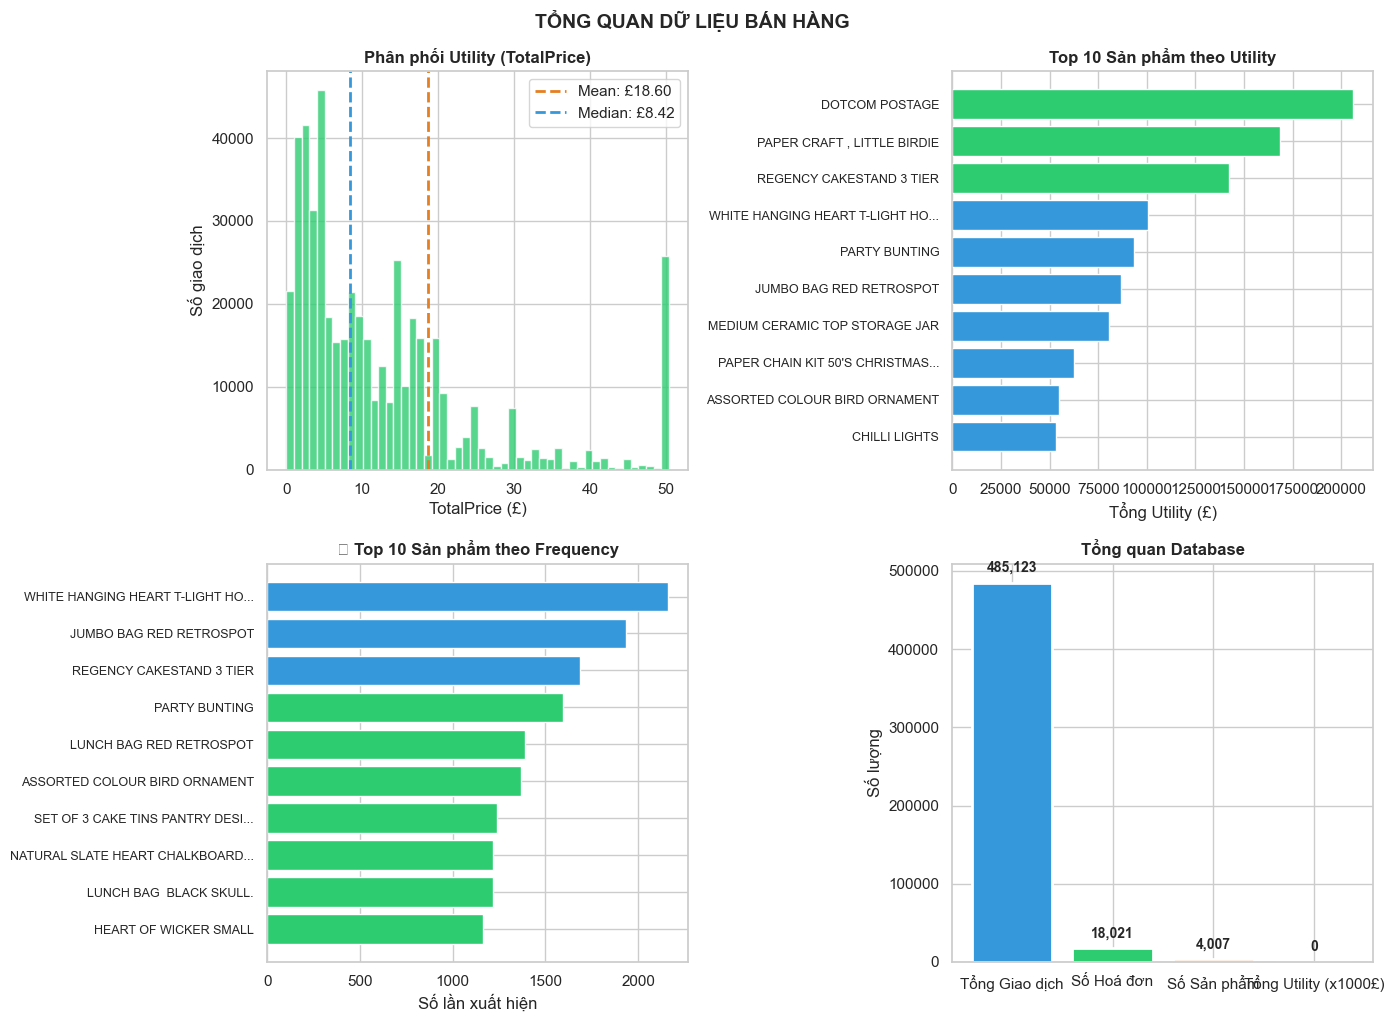

In [16]:
# BIỂU ĐỒ 1: Tổng quan dữ liệu với 3 màu chủ đạo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1.1 Phân phối TotalPrice (Utility)
ax1 = axes[0, 0]
df[TOTAL_COL].clip(upper=df[TOTAL_COL].quantile(0.95)).hist(
    bins=50, ax=ax1, color=COLOR_GREEN, edgecolor='white', alpha=0.8
)
ax1.axvline(df[TOTAL_COL].mean(), color=COLOR_ORANGE, linestyle='--', linewidth=2, label=f'Mean: £{df[TOTAL_COL].mean():.2f}')
ax1.axvline(df[TOTAL_COL].median(), color=COLOR_BLUE, linestyle='--', linewidth=2, label=f'Median: £{df[TOTAL_COL].median():.2f}')
ax1.set_title('Phân phối Utility (TotalPrice)', fontsize=12, fontweight='bold')
ax1.set_xlabel('TotalPrice (£)')
ax1.set_ylabel('Số giao dịch')
ax1.legend()

# 1.2 Top 10 sản phẩm theo Utility
ax2 = axes[0, 1]
top_utility = df.groupby(ITEM_COL)[TOTAL_COL].sum().nlargest(10)
colors_top = [COLOR_GREEN if i < 3 else COLOR_BLUE for i in range(len(top_utility))]
ax2.barh(range(len(top_utility)), top_utility.values, color=colors_top)
ax2.set_yticks(range(len(top_utility)))
ax2.set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_utility.index], fontsize=9)
ax2.invert_yaxis()
ax2.set_title('Top 10 Sản phẩm theo Utility', fontsize=12, fontweight='bold')
ax2.set_xlabel('Tổng Utility (£)')

# 1.3 Top 10 sản phẩm theo Frequency
ax3 = axes[1, 0]
top_freq = df.groupby(ITEM_COL)[INVOICE_COL].nunique().nlargest(10)
colors_freq = [COLOR_BLUE if i < 3 else COLOR_GREEN for i in range(len(top_freq))]
ax3.barh(range(len(top_freq)), top_freq.values, color=colors_freq)
ax3.set_yticks(range(len(top_freq)))
ax3.set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_freq.index], fontsize=9)
ax3.invert_yaxis()
ax3.set_title('🔢 Top 10 Sản phẩm theo Frequency', fontsize=12, fontweight='bold')
ax3.set_xlabel('Số lần xuất hiện')

# 1.4 So sánh tổng quan
ax4 = axes[1, 1]
metrics = ['Tổng Giao dịch', 'Số Hoá đơn', 'Số Sản phẩm', 'Tổng Utility (x1000£)']
values = [
    df.shape[0],
    df[INVOICE_COL].nunique(),
    df[ITEM_COL].nunique(),
    total_utility / 1000
]
colors_bar = [COLOR_BLUE, COLOR_GREEN, COLOR_ORANGE, COLOR_GREEN]
bars = ax4.bar(metrics, values, color=colors_bar, edgecolor='white', linewidth=2)
ax4.set_title('Tổng quan Database', fontsize=12, fontweight='bold')
ax4.set_ylabel('Số lượng')

# Thêm giá trị trên thanh
for bar, val in zip(bars, values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.02,
             f'{val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.suptitle('TỔNG QUAN DỮ LIỆU BÁN HÀNG', fontsize=14, fontweight='bold', y=1.02)

# Lưu biểu đồ
chart_path = os.path.join(LAB_OUTPUT_DIR, '3.3 Tong Quan Du Lieu.png')
plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"✅ Đã lưu biểu đồ: {chart_path}")
plt.show()

## 4. Triển khai High-Utility Itemset Mining

### 4.1 Class HighUtilityMiner

In [17]:
class HighUtilityMiner:
    """
    High-Utility Itemset Mining using TWU-based approach.
    
    Thuật toán này sử dụng Transaction-Weighted Utilization (TWU) 
    làm upper bound để cắt tỉa không gian tìm kiếm hiệu quả.
    """
    
    def __init__(self, df, invoice_col, item_col, quantity_col, utility_col):
        """
        Khởi tạo HighUtilityMiner.
        
        Args:
            df: DataFrame chứa dữ liệu giao dịch
            invoice_col: Tên cột mã hoá đơn
            item_col: Tên cột sản phẩm
            quantity_col: Tên cột số lượng
            utility_col: Tên cột utility (doanh thu/lợi nhuận)
        """
        self.df = df.copy()
        self.invoice_col = invoice_col
        self.item_col = item_col
        self.quantity_col = quantity_col
        self.utility_col = utility_col
        
        # Chuẩn bị dữ liệu
        self._prepare_data()
        
    def _prepare_data(self):
        """Chuẩn bị dữ liệu cho HUIM."""
        # Tính utility cho mỗi item trong mỗi giao dịch
        self.transactions = {}
        self.transaction_utilities = {}  # TU(T_k)
        self.item_utilities = defaultdict(float)  # Tổng utility của mỗi item
        self.item_twu = defaultdict(float)  # TWU của mỗi item
        
        for invoice, group in self.df.groupby(self.invoice_col):
            # Lưu các item và utility trong giao dịch
            items_utilities = {}
            for _, row in group.iterrows():
                item = row[self.item_col]
                utility = row[self.utility_col]
                items_utilities[item] = items_utilities.get(item, 0) + utility
            
            self.transactions[invoice] = items_utilities
            tu = sum(items_utilities.values())  # Transaction Utility
            self.transaction_utilities[invoice] = tu
            
            # Cập nhật TWU cho mỗi item
            for item in items_utilities:
                self.item_twu[item] += tu
                self.item_utilities[item] += items_utilities[item]
        
        self.total_utility = sum(self.transaction_utilities.values())
        print(f"Đã chuẩn bị {len(self.transactions):,} giao dịch")
        print(f"Tổng utility của database: £{self.total_utility:,.2f}")
    
    def mine_high_utility_itemsets(self, min_utility, max_length=3):
        """
        Khai thác High-Utility Itemsets sử dụng TWU pruning.
        
        Args:
            min_utility: Ngưỡng utility tối thiểu
            max_length: Độ dài tối đa của itemset
            
        Returns:
            DataFrame chứa các High-Utility Itemsets
        """
        print(f"\n=== Mining High-Utility Itemsets ===")
        print(f"Min Utility: £{min_utility:,.2f}")
        print(f"Max Length: {max_length}")
        
        start_time = time.time()
        
        # Bước 1: Lọc các item có TWU >= min_utility
        promising_items = [
            item for item, twu in self.item_twu.items() 
            if twu >= min_utility
        ]
        print(f"Số item có TWU >= min_utility: {len(promising_items):,}")
        
        # Bước 2: Tính utility thực tế cho 1-itemsets
        hui_results = []
        
        for item in promising_items:
            utility = self.item_utilities[item]
            if utility >= min_utility:
                hui_results.append({
                    'itemset': frozenset([item]),
                    'utility': utility,
                    'length': 1,
                    'twu': self.item_twu[item]
                })
        
        print(f"1-itemsets HUI: {len(hui_results):,}")
        
        # Bước 3: Sinh k-itemsets (k >= 2)
        if max_length >= 2:
            # Tạo itemset TWU map cho việc generate candidates
            for k in range(2, max_length + 1):
                k_itemsets = self._generate_k_itemsets(
                    promising_items, k, min_utility
                )
                hui_results.extend(k_itemsets)
                print(f"{k}-itemsets HUI: {len(k_itemsets):,}")
                
                if len(k_itemsets) == 0:
                    break
        
        elapsed = time.time() - start_time
        print(f"\nThời gian chạy: {elapsed:.2f} giây")
        print(f"Tổng số High-Utility Itemsets: {len(hui_results):,}")
        
        # Tạo DataFrame kết quả
        if hui_results:
            df_hui = pd.DataFrame(hui_results)
            df_hui['itemset_str'] = df_hui['itemset'].apply(
                lambda x: ', '.join(sorted(list(x)))
            )
            df_hui['utility_percent'] = (df_hui['utility'] / self.total_utility * 100)
            df_hui = df_hui.sort_values('utility', ascending=False).reset_index(drop=True)
            return df_hui
        else:
            return pd.DataFrame()
    
    def _generate_k_itemsets(self, items, k, min_utility):
        """
        Sinh và đánh giá k-itemsets.
        
        Args:
            items: Danh sách các item tiềm năng
            k: Độ dài itemset
            min_utility: Ngưỡng utility tối thiểu
            
        Returns:
            List các k-itemsets có utility >= min_utility
        """
        results = []
        
        # Sinh tất cả k-itemsets từ promising items
        for combo in itertools.combinations(sorted(items), k):
            itemset = frozenset(combo)
            
            # Tính TWU của itemset
            twu = self._calculate_twu(itemset)
            
            # Pruning: nếu TWU < min_utility, bỏ qua
            if twu < min_utility:
                continue
            
            # Tính utility thực tế
            utility = self._calculate_utility(itemset)
            
            if utility >= min_utility:
                results.append({
                    'itemset': itemset,
                    'utility': utility,
                    'length': k,
                    'twu': twu
                })
        
        return results
    
    def _calculate_twu(self, itemset):
        """Tính Transaction-Weighted Utilization của itemset."""
        twu = 0
        for invoice, items_utils in self.transactions.items():
            if itemset.issubset(set(items_utils.keys())):
                twu += self.transaction_utilities[invoice]
        return twu
    
    def _calculate_utility(self, itemset):
        """Tính utility thực tế của itemset."""
        total_utility = 0
        for invoice, items_utils in self.transactions.items():
            if itemset.issubset(set(items_utils.keys())):
                # Cộng utility của các item trong itemset
                for item in itemset:
                    total_utility += items_utils.get(item, 0)
        return total_utility
    
    def get_item_statistics(self):
        """Lấy thống kê về utility của từng item."""
        stats = []
        for item in self.item_utilities:
            stats.append({
                'item': item,
                'utility': self.item_utilities[item],
                'twu': self.item_twu[item],
                'utility_percent': self.item_utilities[item] / self.total_utility * 100
            })
        
        df_stats = pd.DataFrame(stats)
        df_stats = df_stats.sort_values('utility', ascending=False).reset_index(drop=True)
        return df_stats

In [18]:
class UPTreeNode:
    """
    Node trong UP-Tree (Utility Pattern Tree).
    
    Mỗi node lưu trữ thông tin về một item trong một path,
    bao gồm count, utility và link đến các node cùng item khác.
    """
    def __init__(self, item=None, parent=None):
        self.item = item
        self.parent = parent
        self.children = {}  # {item: UPTreeNode}
        self.count = 0  # Số lần xuất hiện
        self.node_utility = 0  # Tổng utility tại node này
        self.node_link = None  # Link đến node cùng item
    
    def add_child(self, item, utility=0):
        """
        Thêm child node hoặc update nếu đã tồn tại.
        
        Args:
            item: Item name
            utility: Utility của item trong transaction
            
        Returns:
            Child node
        """
        if item in self.children:
            child = self.children[item]
            child.count += 1
            child.node_utility += utility
        else:
            child = UPTreeNode(item, self)
            child.count = 1
            child.node_utility = utility
            self.children[item] = child
        
        return child
    
    def get_path(self):
        """
        Lấy đường đi từ root đến node này.
        
        Returns:
            List of items từ root đến node (không bao gồm root)
        """
        path = []
        node = self
        while node.parent is not None:
            path.append(node.item)
            node = node.parent
        return path[::-1]
    
    def get_path_utility(self):
        """
        Lấy utility của path từ root đến node này.
        
        Returns:
            Dict {item: utility} cho path
        """
        path_utils = {}
        node = self
        while node.parent is not None:
            if node.item is not None:
                path_utils[node.item] = node.node_utility
            node = node.parent
        return path_utils
    
    def __repr__(self):
        """String representation cho debugging."""
        return f"Node(item={self.item}, count={self.count}, utility={self.node_utility:.2f})"


class UPGrowthMiner:
    """
    UP-Growth: Tree-based High-Utility Itemset Mining.
    
    Thuật toán sử dụng UP-Tree (Utility Pattern Tree) và pattern growth approach
    để khai phá High-Utility Itemsets hiệu quả mà không cần sinh candidates.
    
    Key features:
    - Xây dựng UP-Tree compact từ database
    - Mining recursively qua conditional pattern bases
    - Tránh candidate generation (nhanh hơn TWU-based)
    - Sử dụng TWU để pruning early
    """
    
    def __init__(self, df, invoice_col, item_col, quantity_col, utility_col):
        """
        Khởi tạo UPGrowthMiner.
        
        Args:
            df: DataFrame chứa dữ liệu giao dịch
            invoice_col: Tên cột mã hoá đơn
            item_col: Tên cột sản phẩm
            quantity_col: Tên cột số lượng
            utility_col: Tên cột utility (doanh thu/lợi nhuận)
        """
        self.df = df.copy()
        self.invoice_col = invoice_col
        self.item_col = item_col
        self.quantity_col = quantity_col
        self.utility_col = utility_col
        
        # Chuẩn bị dữ liệu
        self._prepare_data()
        
        # Statistics tracking
        self.nodes_created = 0
        self.trees_built = 0
        
    def _prepare_data(self):
        """Chuẩn bị dữ liệu cho UP-Growth."""
        self.transactions = {}
        self.transaction_utilities = {}
        self.item_utilities = defaultdict(float)
        self.item_twu = defaultdict(float)
        
        for invoice, group in self.df.groupby(self.invoice_col):
            items_utilities = {}
            for _, row in group.iterrows():
                item = row[self.item_col]
                utility = row[self.utility_col]
                items_utilities[item] = items_utilities.get(item, 0) + utility
            
            self.transactions[invoice] = items_utilities
            
            # Tính transaction utility
            tu = sum(items_utilities.values())
            self.transaction_utilities[invoice] = tu
            
            # Tính TWU và item utilities
            for item in items_utilities:
                self.item_twu[item] += tu
                self.item_utilities[item] += items_utilities[item]
        
        self.total_utility = sum(self.transaction_utilities.values())
        log_progress(f"UP-Growth: Đã chuẩn bị {len(self.transactions):,} giao dịch")
    
    def _build_up_tree(self, transactions_filtered, item_order):
        """
        Xây dựng UP-Tree từ transactions đã filter.
        
        Args:
            transactions_filtered: Dict {invoice: {item: utility}}
            item_order: Dict {item: order} để sắp xếp consistent
            
        Returns:
            Tuple (root, header_table)
            - root: UPTreeNode root của tree
            - header_table: Dict {item: node_list}
        """
        root = UPTreeNode()
        header_table = defaultdict(list)
        
        self.trees_built += 1
        
        for invoice, items_utils in transactions_filtered.items():
            # Sắp xếp items theo order (TWU descending)
            sorted_items = sorted(
                items_utils.keys(),
                key=lambda x: item_order.get(x, float('inf'))
            )
            
            # Insert vào tree
            current_node = root
            for item in sorted_items:
                utility = items_utils[item]
                
                # Add child (tạo mới hoặc update)
                child = current_node.add_child(item, utility)
                
                # Thêm vào header table nếu là node mới
                if child.count == 1:  # Node mới tạo
                    # Link với node cùng item trước đó
                    if header_table[item]:
                        last_node = header_table[item][-1]
                        last_node.node_link = child
                    header_table[item].append(child)
                    self.nodes_created += 1
                
                current_node = child
        
        return root, dict(header_table)
    
    def mine_high_utility_itemsets(self, min_utility, max_length=3):
        """
        Khai thác High-Utility Itemsets sử dụng UP-Growth pattern growth.
        
        Args:
            min_utility: Ngưỡng utility tối thiểu
            max_length: Độ dài tối đa của itemset
            
        Returns:
            DataFrame chứa các High-Utility Itemsets
        """
        log_progress(f"UP-Growth Mining - Min Utility: £{min_utility:,.2f}, Max Length: {max_length}")
        
        start_time = time.time()
        self.max_length = max_length
        
        # Reset statistics
        self.nodes_created = 0
        self.trees_built = 0
        
        # Bước 1: Filter items có TWU >= min_utility
        promising_items = {
            item: self.item_twu[item] 
            for item, twu in self.item_twu.items()
            if twu >= min_utility
        }
        log_progress(f"UP-Growth: {len(promising_items):,} promising items")
        
        # Bước 2: Tạo item order (TWU descending)
        item_order = {
            item: idx for idx, (item, twu) in 
            enumerate(sorted(promising_items.items(), 
                           key=lambda x: x[1], reverse=True))
        }
        
        # Bước 3: Filter transactions
        transactions_filtered = {}
        for invoice, items_utils in self.transactions.items():
            filtered = {
                item: util for item, util in items_utils.items()
                if item in promising_items
            }
            if filtered:
                transactions_filtered[invoice] = filtered
        
        log_progress(f"UP-Growth: {len(transactions_filtered):,} transactions sau filter")
        
        # Bước 4: Xây dựng Global UP-Tree
        root, header_table = self._build_up_tree(transactions_filtered, item_order)
        
        log_progress(f"UP-Growth: Đã tạo {self.nodes_created:,} nodes trong {self.trees_built} tree(s)")
        
        # Bước 5: Mining từ UP-Tree bằng pattern growth
        hui_results = []
        
        # Mine với mỗi item trong header table (bottom-up)
        items_sorted = sorted(header_table.keys(), 
                            key=lambda x: item_order[x], reverse=True)
        
        for item in items_sorted:
            # Tính utility của single item
            utility = self.item_utilities[item]
            
            if utility >= min_utility:
                hui_results.append({
                    'itemset': frozenset([item]),
                    'utility': utility,
                    'length': 1,
                    'twu': self.item_twu[item]
                })
            
            # Mine với prefix = {item} nếu chưa đạt max_length
            if max_length > 1:
                # Lấy conditional pattern base
                cpb = self._get_conditional_pattern_base(item, header_table[item])
                
                if cpb:
                    # Build conditional UP-Tree
                    cond_tree, cond_header = self._build_conditional_tree(
                        cpb, min_utility, item_order
                    )
                    
                    # Mine recursively từ conditional tree
                    if cond_header:
                        sub_patterns = self._mine_tree_recursive(
                            cond_header, min_utility, [item], 
                            item_order, max_length
                        )
                        hui_results.extend(sub_patterns)
        
        elapsed = time.time() - start_time
        log_progress(
            f"UP-Growth: Hoàn thành trong {elapsed:.2f}s - "
            f"{len(hui_results):,} HUI, {self.trees_built} conditional trees", 
            "SUCCESS"
        )
        
        # Tạo DataFrame
        if hui_results:
            df_hui = pd.DataFrame(hui_results)
            df_hui['itemset_str'] = df_hui['itemset'].apply(
                lambda x: ', '.join(sorted(list(x)))
            )
            df_hui['utility_percent'] = (df_hui['utility'] / self.total_utility * 100)
            df_hui = df_hui.sort_values('utility', ascending=False).reset_index(drop=True)
            return df_hui
        else:
            return pd.DataFrame()
    
    def _get_conditional_pattern_base(self, item, node_list):
        """
        Lấy conditional pattern base cho một item.
        
        Args:
            item: Item cần lấy CPB
            node_list: List các nodes chứa item này
            
        Returns:
            List of patterns: [(prefix_items, utility_dict), ...]
        """
        cpb = []
        
        for node in node_list:
            # Lấy path từ root đến parent của node
            path = []
            path_utils = {}
            current = node.parent
            
            while current.parent is not None:  # Không lấy root
                path.append(current.item)
                path_utils[current.item] = current.node_utility
                current = current.parent
            
            if path:  # Nếu có prefix
                path.reverse()  # Đảo ngược để đúng thứ tự
                # Mỗi path xuất hiện node.count lần với utility = node.node_utility
                cpb.append((path, path_utils, node.count, node.node_utility))
        
        return cpb
    
    def _build_conditional_tree(self, cpb, min_utility, item_order):
        """
        Xây dựng conditional UP-Tree từ conditional pattern base.
        
        Args:
            cpb: Conditional pattern base
            min_utility: Min utility threshold
            item_order: Item ordering
            
        Returns:
            Tuple (root, header_table)
        """
        # Tính TWU cho mỗi item trong CPB
        item_twu_cond = defaultdict(float)
        for path, path_utils, count, node_util in cpb:
            # TWU = tổng utility của transaction chứa item
            transaction_util = sum(path_utils.values()) + node_util
            for item in path:
                item_twu_cond[item] += transaction_util * count
        
        # Filter items có TWU >= min_utility
        promising = {
            item: twu for item, twu in item_twu_cond.items()
            if twu >= min_utility
        }
        
        if not promising:
            return None, {}
        
        # Build conditional tree
        root = UPTreeNode()
        header_table = defaultdict(list)
        
        self.trees_built += 1
        
        for path, path_utils, count, _ in cpb:
            # Filter và sort items trong path
            filtered_path = [
                item for item in path 
                if item in promising
            ]
            
            if not filtered_path:
                continue
            
            # Sort theo order
            filtered_path.sort(key=lambda x: item_order.get(x, float('inf')))
            
            # Insert vào tree
            current_node = root
            for item in filtered_path:
                utility = path_utils.get(item, 0) * count
                child = current_node.add_child(item, utility)
                
                if child.count == count:  # Node mới
                    if header_table[item]:
                        header_table[item][-1].node_link = child
                    header_table[item].append(child)
                    self.nodes_created += 1
                
                current_node = child
        
        return root, dict(header_table)
    
    def _mine_tree_recursive(self, header_table, min_utility, prefix, item_order, max_length):
        """
        Mine recursively từ conditional tree.
        
        Args:
            header_table: Header table của conditional tree
            min_utility: Min utility threshold
            prefix: Prefix itemset hiện tại
            item_order: Item ordering
            max_length: Max itemset length
            
        Returns:
            List of HUI patterns
        """
        hui = []
        
        # Nếu đã đạt max_length, dừng
        if len(prefix) >= max_length:
            return hui
        
        # Mine với mỗi item (bottom-up theo order)
        items_sorted = sorted(header_table.keys(), 
                            key=lambda x: item_order.get(x, float('inf')), 
                            reverse=True)
        
        for item in items_sorted:
            # Tạo new itemset = prefix + {item}
            new_itemset = prefix + [item]
            
            # Tính utility của new_itemset
            utility = self._calculate_itemset_utility_from_nodes(
                header_table[item], new_itemset
            )
            
            if utility >= min_utility:
                hui.append({
                    'itemset': frozenset(new_itemset),
                    'utility': utility,
                    'length': len(new_itemset),
                    'twu': 0  # TWU không cần thiết cho kết quả cuối
                })
            
            # Tiếp tục mine nếu chưa đạt max_length
            if len(new_itemset) < max_length:
                # Lấy CPB cho item
                cpb = self._get_conditional_pattern_base(item, header_table[item])
                
                if cpb:
                    # Build conditional tree
                    cond_tree, cond_header = self._build_conditional_tree(
                        cpb, min_utility, item_order
                    )
                    
                    # Mine recursively
                    if cond_header:
                        sub_hui = self._mine_tree_recursive(
                            cond_header, min_utility, new_itemset, 
                            item_order, max_length
                        )
                        hui.extend(sub_hui)
        
        return hui
    
    def _calculate_itemset_utility_from_nodes(self, node_list, itemset):
        """
        Tính utility của itemset từ node list.
        
        Simplified: Tính từ transactions gốc (chính xác hơn).
        """
        utility = 0
        itemset_set = set(itemset)
        
        for invoice, items_utils in self.transactions.items():
            if itemset_set.issubset(set(items_utils.keys())):
                for item in itemset_set:
                    utility += items_utils[item]
        
        return utility

### 4.2 Class UPGrowthMiner (UP-Growth Algorithm)

UP-Growth là thuật toán cải tiến sử dụng cấu trúc cây (tree-based) tương tự FP-Growth để khai phá High-Utility Itemsets hiệu quả hơn.

### 4.3 Khai thác High-Utility Itemsets

In [19]:
# Khởi tạo HighUtilityMiner
hui_miner = HighUtilityMiner(
    df=df,
    invoice_col=INVOICE_COL,
    item_col=ITEM_COL,
    quantity_col=QUANTITY_COL,
    utility_col=TOTAL_COL
)

log_progress(
    f"HighUtilityMiner initialized: {len(hui_miner.transactions):,} transactions, "
    f"total utility £{hui_miner.total_utility:,.2f}",
    "SUCCESS"
)

Đã chuẩn bị 18,021 giao dịch
Tổng utility của database: £9,025,222.08
[2025-12-23 08:06:05][SUCCESS] HighUtilityMiner initialized: 18,021 transactions, total utility £9,025,222.08


'[2025-12-23 08:06:05][SUCCESS] HighUtilityMiner initialized: 18,021 transactions, total utility £9,025,222.08'

In [20]:
# Khởi tạo UPGrowthMiner
up_miner = UPGrowthMiner(
    df=df,
    invoice_col=INVOICE_COL,
    item_col=ITEM_COL,
    quantity_col=QUANTITY_COL,
    utility_col=TOTAL_COL
)

log_progress(
    f"UPGrowthMiner initialized: {len(up_miner.transactions):,} transactions, "
    f"total utility £{up_miner.total_utility:,.2f}",
    "SUCCESS"
)

[2025-12-23 08:06:47][INFO] UP-Growth: Đã chuẩn bị 18,021 giao dịch
[2025-12-23 08:06:47][SUCCESS] UPGrowthMiner initialized: 18,021 transactions, total utility £9,025,222.08


'[2025-12-23 08:06:47][SUCCESS] UPGrowthMiner initialized: 18,021 transactions, total utility £9,025,222.08'

In [21]:
# Sử dụng tham số từ cell Parameters phía trên
test_thresholds = TEST_THRESHOLDS
print(f"\n🔬 Bắt đầu thử nghiệm với {len(test_thresholds)} ngưỡng utility")
print(f"📏 Max itemset length: {MAX_ITEMSET_LENGTH}")
print(f"⏱️ Timeout: {EXPERIMENT_TIMEOUT}s ({EXPERIMENT_TIMEOUT/60:.1f} min) mỗi experiment\n")


🔬 Bắt đầu thử nghiệm với 2 ngưỡng utility
📏 Max itemset length: 3
⏱️ Timeout: 300s (5.0 min) mỗi experiment



In [22]:
# Tính ngưỡng utility
if MIN_UTILITY_ABSOLUTE > 0:
    min_utility = MIN_UTILITY_ABSOLUTE
else:
    min_utility = hui_miner.total_utility * MIN_UTILITY_PERCENT

print(f"Ngưỡng Min Utility: £{min_utility:,.2f}")
print(f"(Tương đương {min_utility/hui_miner.total_utility*100:.4f}% tổng doanh thu)")

Ngưỡng Min Utility: £902,522.21
(Tương đương 10.0000% tổng doanh thu)


In [23]:
twu_experiment_results = []

for idx, threshold_pct in enumerate(test_thresholds, 1):
    try:
        log_progress(f"\n{'='*60}", "INFO")
        log_progress(f"TWU Experiment {idx}/{len(test_thresholds)}: Threshold = {threshold_pct*100}%", "INFO")
        log_progress(f"⏱️ Timeout: {EXPERIMENT_TIMEOUT}s ({EXPERIMENT_TIMEOUT/60:.1f} min)", "INFO")
        log_progress(f"{'='*60}", "INFO")
        
        # Tính min_utility
        min_util = hui_miner.total_utility * threshold_pct
        log_progress(f"Min Utility: £{min_util:,.2f}", "INFO")
        
        # Wrapper function với timeout
        def run_mining_with_timeout():
            return hui_miner.mine_high_utility_itemsets(
                min_utility=min_util,
                max_length=MAX_ITEMSET_LENGTH
            )
        
        # Apply timeout decorator
        mining_func = timeout_decorator(EXPERIMENT_TIMEOUT)(run_mining_with_timeout)
        
        # Chạy mining với timeout protection
        start_time = time.time()
        df_hui_test = mining_func()
        runtime = time.time() - start_time
        
        # Thu thập kết quả
        n_itemsets = len(df_hui_test) if not df_hui_test.empty else 0
        n_1itemsets = len(df_hui_test[df_hui_test['length']==1]) if not df_hui_test.empty else 0
        n_2itemsets = len(df_hui_test[df_hui_test['length']==2]) if not df_hui_test.empty else 0
        n_3itemsets = len(df_hui_test[df_hui_test['length']==3]) if not df_hui_test.empty else 0
        
        max_utility = df_hui_test['utility'].max() if not df_hui_test.empty else 0
        avg_utility = df_hui_test['utility'].mean() if not df_hui_test.empty else 0
        
        result = {
            'algorithm': 'TWU-based',
            'min_utility_percent': threshold_pct,
            'min_utility_value': min_util,
            'runtime_sec': runtime,
            'n_itemsets': n_itemsets,
            'n_1itemsets': n_1itemsets,
            'n_2itemsets': n_2itemsets,
            'n_3itemsets': n_3itemsets,
            'max_utility': max_utility,
            'avg_utility': avg_utility,
            'timeout': False,
            'status': 'completed',
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        
        twu_experiment_results.append(result)
        
        log_progress(f"✓ Kết quả: {n_itemsets} itemsets, Runtime: {runtime:.2f}s", "SUCCESS")
    
    except TimeoutError as e:
        log_progress(f"⏱️ TIMEOUT sau {EXPERIMENT_TIMEOUT}s cho threshold {threshold_pct*100}%", "TIMEOUT")
        log_progress(f"Skipping experiment và tiếp tục với threshold tiếp theo...", "WARNING")
        
        # Lưu kết quả timeout
        result = {
            'algorithm': 'TWU-based',
            'min_utility_percent': threshold_pct,
            'min_utility_value': hui_miner.total_utility * threshold_pct,
            'runtime_sec': EXPERIMENT_TIMEOUT,
            'n_itemsets': -1,  # -1 indicates timeout
            'n_1itemsets': -1,
            'n_2itemsets': -1,
            'n_3itemsets': -1,
            'max_utility': 0,
            'avg_utility': 0,
            'timeout': True,
            'status': 'timeout',
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        twu_experiment_results.append(result)
        
    except Exception as e:
        log_progress(f"✗ Lỗi khi chạy threshold {threshold_pct*100}%: {str(e)}", "ERROR")
        log_progress(traceback.format_exc(), "ERROR")
        
        # Lưu kết quả lỗi
        result = {
            'algorithm': 'TWU-based',
            'min_utility_percent': threshold_pct,
            'min_utility_value': hui_miner.total_utility * threshold_pct,
            'runtime_sec': 0,
            'n_itemsets': -2,  # -2 indicates error
            'n_1itemsets': -2,
            'n_2itemsets': -2,
            'n_3itemsets': -2,
            'max_utility': 0,
            'avg_utility': 0,
            'timeout': False,
            'status': f'error: {str(e)}',
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        twu_experiment_results.append(result)

# Lưu kết quả
df_twu_results = pd.DataFrame(twu_experiment_results)
twu_csv_path = os.path.join(LAB_OUTPUT_DIR, 'KetQuaThuNghiem_TapGiaTri_MinUtilityPercent.csv')
df_twu_results.to_csv(twu_csv_path, index=False, encoding='utf-8-sig')

log_progress(f"\n✓ Đã lưu kết quả TWU vào: {twu_csv_path}", "SUCCESS")
print("\nKết quả TWU-based:")
df_twu_results[['min_utility_percent', 'runtime_sec', 'n_itemsets', 'n_1itemsets', 'n_2itemsets', 'n_3itemsets']]

[2025-12-23 08:06:47][INFO] 
[2025-12-23 08:06:47][INFO] TWU Experiment 1/2: Threshold = 0.5%
[2025-12-23 08:06:47][INFO] ⏱️ Timeout: 300s (5.0 min)
[2025-12-23 08:06:47][INFO] ============================================================
[2025-12-23 08:06:47][INFO] Min Utility: £45,126.11

=== Mining High-Utility Itemsets ===
Min Utility: £45,126.11
Max Length: 3
Số item có TWU >= min_utility: 2,480
1-itemsets HUI: 10


[2025-12-23 08:11:47][TIMEOUT] ⏱️ TIMEOUT sau 300s cho threshold 0.5%
[2025-12-23 08:11:47][WARNING] Skipping experiment và tiếp tục với threshold tiếp theo...
[2025-12-23 08:11:47][INFO] 


[2025-12-23 08:11:47][INFO] TWU Experiment 2/2: Threshold = 0.1%
[2025-12-23 08:11:47][INFO] ⏱️ Timeout: 300s (5.0 min)
[2025-12-23 08:11:48][INFO] ============================================================


[2025-12-23 08:11:48][INFO] Min Utility: £9,025.22

=== Mining High-Utility Itemsets ===
Min Utility: £9,025.22
Max Length: 3
Số item có TWU >= min_utility: 3,270
1-itemsets HUI: 211


[2025-12-23 08:16:48][TIMEOUT] ⏱️ TIMEOUT sau 300s cho threshold 0.1%
[2025-12-23 08:16:48][WARNING] Skipping experiment và tiếp tục với threshold tiếp theo...


[2025-12-23 08:16:49][SUCCESS] 
✓ Đã lưu kết quả TWU vào: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\KetQuaThuNghiem_TapGiaTri_MinUtilityPercent.csv

Kết quả TWU-based:


min_utility_percent  runtime_sec  n_itemsets  n_1itemsets  n_2itemsets  \
0                0.005          300          -1           -1           -1   
1                0.001          300          -1           -1           -1   

   n_3itemsets  
0           -1  
1           -1

In [24]:
upgrowth_experiment_results = []

for idx, threshold_pct in enumerate(test_thresholds, 1):
    try:
        log_progress(f"\n{'='*60}", "INFO")
        log_progress(f"UP-Growth Experiment {idx}/{len(test_thresholds)}: Threshold = {threshold_pct*100}%", "INFO")
        log_progress(f"⏱️ Timeout: {EXPERIMENT_TIMEOUT}s ({EXPERIMENT_TIMEOUT/60:.1f} min)", "INFO")
        log_progress(f"{'='*60}", "INFO")
        
        # Tính min_utility
        min_util = up_miner.total_utility * threshold_pct
        log_progress(f"Min Utility: £{min_util:,.2f}", "INFO")
        
        # Wrapper function với timeout
        def run_mining_with_timeout():
            return up_miner.mine_high_utility_itemsets(
                min_utility=min_util,
                max_length=MAX_ITEMSET_LENGTH
            )
        
        # Apply timeout decorator
        mining_func = timeout_decorator(EXPERIMENT_TIMEOUT)(run_mining_with_timeout)
        
        # Chạy mining với timeout protection
        start_time = time.time()
        df_hui_test = mining_func()
        runtime = time.time() - start_time
        
        # Thu thập kết quả
        n_itemsets = len(df_hui_test) if not df_hui_test.empty else 0
        n_1itemsets = len(df_hui_test[df_hui_test['length']==1]) if not df_hui_test.empty else 0
        n_2itemsets = len(df_hui_test[df_hui_test['length']==2]) if not df_hui_test.empty else 0
        n_3itemsets = len(df_hui_test[df_hui_test['length']==3]) if not df_hui_test.empty else 0
        
        max_utility = df_hui_test['utility'].max() if not df_hui_test.empty else 0
        avg_utility = df_hui_test['utility'].mean() if not df_hui_test.empty else 0
        
        result = {
            'algorithm': 'UP-Growth',
            'min_utility_percent': threshold_pct,
            'min_utility_value': min_util,
            'runtime_sec': runtime,
            'n_itemsets': n_itemsets,
            'n_1itemsets': n_1itemsets,
            'n_2itemsets': n_2itemsets,
            'n_3itemsets': n_3itemsets,
            'max_utility': max_utility,
            'avg_utility': avg_utility,
            'timeout': False,
            'status': 'completed',
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        
        upgrowth_experiment_results.append(result)
        
        log_progress(f"✓ Kết quả: {n_itemsets} itemsets, Runtime: {runtime:.2f}s", "SUCCESS")
    
    except TimeoutError as e:
        log_progress(f"⏱️ TIMEOUT sau {EXPERIMENT_TIMEOUT}s cho threshold {threshold_pct*100}%", "TIMEOUT")
        log_progress(f"Skipping experiment và tiếp tục với threshold tiếp theo...", "WARNING")
        
        # Lưu kết quả timeout
        result = {
            'algorithm': 'UP-Growth',
            'min_utility_percent': threshold_pct,
            'min_utility_value': up_miner.total_utility * threshold_pct,
            'runtime_sec': EXPERIMENT_TIMEOUT,
            'n_itemsets': -1,  # -1 indicates timeout
            'n_1itemsets': -1,
            'n_2itemsets': -1,
            'n_3itemsets': -1,
            'max_utility': 0,
            'avg_utility': 0,
            'timeout': True,
            'status': 'timeout',
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        upgrowth_experiment_results.append(result)
        
    except Exception as e:
        log_progress(f"✗ Lỗi khi chạy threshold {threshold_pct*100}%: {str(e)}", "ERROR")
        log_progress(traceback.format_exc(), "ERROR")
        
        # Lưu kết quả lỗi
        result = {
            'algorithm': 'UP-Growth',
            'min_utility_percent': threshold_pct,
            'min_utility_value': up_miner.total_utility * threshold_pct,
            'runtime_sec': 0,
            'n_itemsets': -2,  # -2 indicates error
            'n_1itemsets': -2,
            'n_2itemsets': -2,
            'n_3itemsets': -2,
            'max_utility': 0,
            'avg_utility': 0,
            'timeout': False,
            'status': f'error: {str(e)}',
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        upgrowth_experiment_results.append(result)

# Lưu kết quả
df_upgrowth_results = pd.DataFrame(upgrowth_experiment_results)
upgrowth_csv_path = os.path.join(LAB_OUTPUT_DIR, 'KetQuaThuNghiem_UPGrowth_MinUtilityPercent.csv')
df_upgrowth_results.to_csv(upgrowth_csv_path, index=False, encoding='utf-8-sig')

log_progress(f"\n✓ Đã lưu kết quả UP-Growth vào: {upgrowth_csv_path}", "SUCCESS")
print("\nKết quả UP-Growth:")
df_upgrowth_results[['min_utility_percent', 'runtime_sec', 'n_itemsets', 'n_1itemsets', 'n_2itemsets', 'n_3itemsets']]

# Tạo df_hui cho phần trực quan hóa ở Section 6
# Sử dụng ngưỡng MIN_UTILITY_PERCENT mặc định
df_hui = hui_miner.mine_high_utility_itemsets(
    min_utility=hui_miner.total_utility * MIN_UTILITY_PERCENT,
    max_length=MAX_ITEMSET_LENGTH
)
log_progress(f"\n✓ Tạo df_hui cho visualization: {len(df_hui)} itemsets", "SUCCESS")

[2025-12-23 08:17:23][INFO] 
[2025-12-23 08:17:23][INFO] UP-Growth Experiment 1/2: Threshold = 0.5%


[2025-12-23 08:17:23][INFO] ⏱️ Timeout: 300s (5.0 min)
[2025-12-23 08:17:24][INFO] ============================================================
[2025-12-23 08:17:24][INFO] Min Utility: £45,126.11


[2025-12-23 08:17:24][INFO] UP-Growth Mining - Min Utility: £45,126.11, Max Length: 3
[2025-12-23 08:17:24][INFO] UP-Growth: 2,480 promising items


[2025-12-23 08:17:24][INFO] UP-Growth: 17,776 transactions sau filter


[2025-12-23 08:17:28][INFO] UP-Growth: Đã tạo 416,015 nodes trong 1 tree(s)


[2025-12-23 08:22:24][TIMEOUT] ⏱️ TIMEOUT sau 300s cho threshold 0.5%


[2025-12-23 08:22:24][WARNING] Skipping experiment và tiếp tục với threshold tiếp theo...
[2025-12-23 08:22:24][INFO] 


[2025-12-23 08:22:25][INFO] UP-Growth Experiment 2/2: Threshold = 0.1%


[2025-12-23 08:22:25][INFO] ⏱️ Timeout: 300s (5.0 min)


[2025-12-23 08:22:26][INFO] ============================================================


[2025-12-23 08:22:26][INFO] Min Utility: £9,025.22
[2025-12-23 08:22:27][INFO] UP-Growth Mining - Min Utility: £9,025.22, Max Length: 3


[2025-12-23 08:22:27][INFO] UP-Growth: 3,270 promising items
[2025-12-23 08:22:27][INFO] UP-Growth: 17,956 transactions sau filter


[2025-12-23 08:22:33][INFO] UP-Growth: Đã tạo 434,327 nodes trong 2 tree(s)


[2025-12-23 08:27:27][TIMEOUT] ⏱️ TIMEOUT sau 300s cho threshold 0.1%


[2025-12-23 08:27:28][WARNING] Skipping experiment và tiếp tục với threshold tiếp theo...


[2025-12-23 08:27:29][SUCCESS] 
✓ Đã lưu kết quả UP-Growth vào: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\KetQuaThuNghiem_UPGrowth_MinUtilityPercent.csv



Kết quả UP-Growth:

=== Mining High-Utility Itemsets ===
Min Utility: £902,522.21
Max Length: 3
Số item có TWU >= min_utility: 65
1-itemsets HUI: 0


2-itemsets HUI: 0

Thời gian chạy: 328.58 giây
Tổng số High-Utility Itemsets: 0
[2025-12-23 08:32:58][SUCCESS] 
✓ Tạo df_hui cho visualization: 0 itemsets


'[2025-12-23 08:32:58][SUCCESS] \n✓ Tạo df_hui cho visualization: 0 itemsets'

In [25]:
# Load CSV results for visualization
twu_csv_path = os.path.join(LAB_OUTPUT_DIR, 'KetQuaThuNghiem_TapGiaTri_MinUtilityPercent.csv')
upgrowth_csv_path = os.path.join(LAB_OUTPUT_DIR, 'KetQuaThuNghiem_UPGrowth_MinUtilityPercent.csv')

df_twu_viz = pd.read_csv(twu_csv_path)
df_upgrowth_viz = pd.read_csv(upgrowth_csv_path)

# Combine both results for comparison
df_combined = pd.concat([df_twu_viz, df_upgrowth_viz], ignore_index=True)

log_progress(f"Loaded {len(df_twu_viz)} TWU results and {len(df_upgrowth_viz)} UP-Growth results", "SUCCESS")
print(f"\nCombined dataframe shape: {df_combined.shape}")
df_combined.head()

[2025-12-23 08:34:42][SUCCESS] Loaded 2 TWU results and 2 UP-Growth results

Combined dataframe shape: (4, 13)


algorithm  min_utility_percent  min_utility_value  runtime_sec  n_itemsets  \
0  TWU-based                0.005       45126.110420          300          -1   
1  TWU-based                0.001        9025.222084          300          -1   
2  UP-Growth                0.005       45126.110420          300          -1   
3  UP-Growth                0.001        9025.222084          300          -1   

   n_1itemsets  n_2itemsets  n_3itemsets  max_utility  avg_utility  timeout  \
0           -1           -1           -1            0            0     True   
1           -1           -1           -1            0            0     True   
2           -1           -1           -1            0            0     True   
3           -1           -1           -1            0            0     True   

    status            timestamp  
0  timeout  2025-12-23 08:11:47  
1  timeout  2025-12-23 08:16:48  
2  timeout  2025-12-23 08:22:24  
3  timeout  2025-12-23 08:27:28

✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\5.1 So Sanh Thoi Gian Chay.png


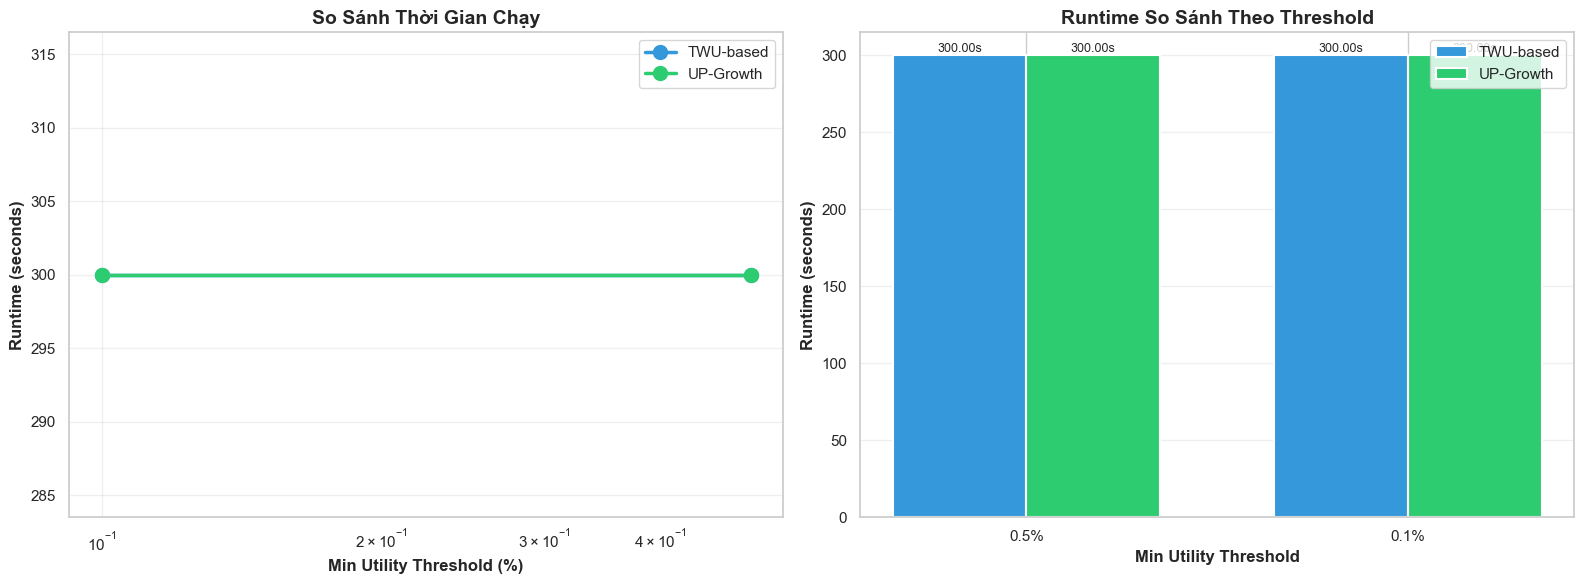

[2025-12-23 08:41:41][INFO] 
[2025-12-23 08:41:42][INFO] PHÂN TÍCH SPEEDUP (TWU-based vs UP-Growth)
[2025-12-23 08:41:42][INFO] ============================================================


[2025-12-23 08:41:42][INFO] Threshold 0.5%: TWU-based nhanh hơn 1.00x


[2025-12-23 08:41:43][INFO] Threshold 0.1%: TWU-based nhanh hơn 1.00x


In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Line chart - Runtime vs Threshold
for algo in df_combined['algorithm'].unique():
    df_algo = df_combined[df_combined['algorithm'] == algo]
    color = COLOR_BLUE if algo == 'TWU-based' else COLOR_GREEN
    ax1.plot(df_algo['min_utility_percent'] * 100, df_algo['runtime_sec'], 
             marker='o', linewidth=2.5, markersize=10, label=algo, color=color)

ax1.set_xlabel('Min Utility Threshold (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Runtime (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('So Sánh Thời Gian Chạy', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Chỉ dùng log scale nếu có nhiều hơn 1 threshold và giá trị > 0
if len(test_thresholds) > 1 and df_combined['min_utility_percent'].min() > 0:
    ax1.set_xscale('log')

# Plot 2: Bar chart - Runtime comparison
x_pos = np.arange(len(test_thresholds))
width = 0.35

twu_runtimes = df_twu_viz['runtime_sec'].values
up_runtimes = df_upgrowth_viz['runtime_sec'].values

bars1 = ax2.bar(x_pos - width/2, twu_runtimes, width, label='TWU-based', 
                color=COLOR_BLUE, edgecolor='white', linewidth=1.5)
bars2 = ax2.bar(x_pos + width/2, up_runtimes, width, label='UP-Growth', 
                color=COLOR_GREEN, edgecolor='white', linewidth=1.5)

ax2.set_xlabel('Min Utility Threshold', fontsize=12, fontweight='bold')
ax2.set_ylabel('Runtime (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Runtime So Sánh Theo Threshold', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'{t*100}%' for t in test_thresholds])
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# Thêm giá trị trên thanh
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}s', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# Lưu biểu đồ
chart_path = os.path.join(LAB_OUTPUT_DIR, '5.1 So Sanh Thoi Gian Chay.png')
plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"✅ Đã lưu biểu đồ: {chart_path}")
plt.show()

# Tính speedup
log_progress("\n" + "="*60, "INFO")
log_progress("PHÂN TÍCH SPEEDUP (TWU-based vs UP-Growth)", "INFO")
log_progress("="*60, "INFO")
for i, threshold in enumerate(test_thresholds):
    if up_runtimes[i] > 0:
        speedup = twu_runtimes[i] / up_runtimes[i]
        faster = "UP-Growth" if speedup > 1 else "TWU-based"
        log_progress(f"Threshold {threshold*100}%: {faster} nhanh hơn {abs(speedup):.2f}x", "INFO")

✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\5.1 Runtime vs So Luong Itemsets.png


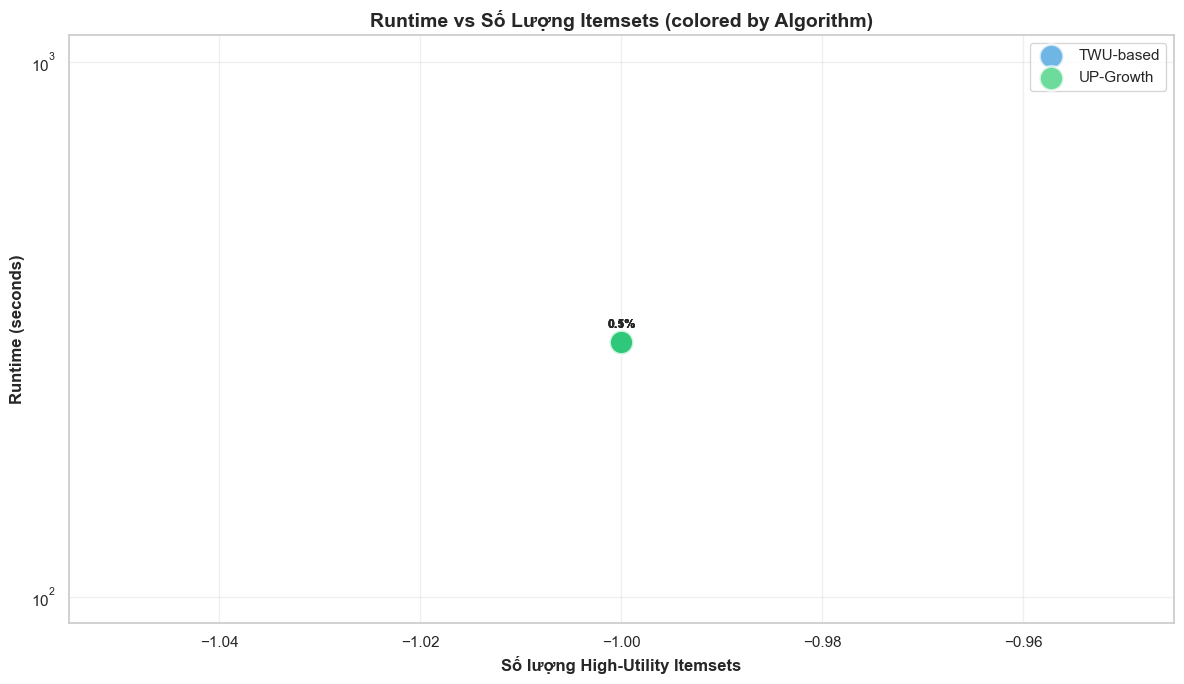

In [27]:
plt.figure(figsize=(12, 7))

# Kiểm tra nếu tất cả itemsets = 0
if df_combined['n_itemsets'].max() == 0:
    print("⚠️ Không có High-Utility Itemsets nào được tìm thấy ở các threshold đã test.")
    print("💡 Khuyến nghị: Giảm threshold để tìm được itemsets.")
    
    # Vẽ biểu đồ thông báo
    plt.text(0.5, 0.5, 'Không có HUI nào được tìm thấy\n\nThreshold quá cao!\nHãy giảm MIN_UTILITY_PERCENT', 
             ha='center', va='center', fontsize=14, 
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.xlabel('Số lượng High-Utility Itemsets', fontsize=12, fontweight='bold')
    plt.ylabel('Runtime (seconds)', fontsize=12, fontweight='bold')
    plt.title('Runtime vs Số Lượng Itemsets (colored by Algorithm)', fontsize=14, fontweight='bold')
else:
    for algo in df_combined['algorithm'].unique():
        df_algo = df_combined[df_combined['algorithm'] == algo]
        color = COLOR_BLUE if algo == 'TWU-based' else COLOR_GREEN
        
        plt.scatter(df_algo['n_itemsets'], df_algo['runtime_sec'], 
                    s=300, alpha=0.7, color=color, edgecolors='white', linewidth=2,
                    label=algo)
        
        # Thêm labels cho mỗi điểm
        for _, row in df_algo.iterrows():
            plt.annotate(f"{row['min_utility_percent']*100}%",
                        (row['n_itemsets'], row['runtime_sec']),
                        textcoords="offset points", xytext=(0,10),
                        ha='center', fontsize=9, fontweight='bold')

    plt.xlabel('Số lượng High-Utility Itemsets', fontsize=12, fontweight='bold')
    plt.ylabel('Runtime (seconds)', fontsize=12, fontweight='bold')
    plt.title('Runtime vs Số Lượng Itemsets (colored by Algorithm)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3)

    if df_combined['n_itemsets'].min() > 0:
        plt.xscale('log')
    if df_combined['runtime_sec'].min() > 0:
        plt.yscale('log')

plt.tight_layout()

# Lưu biểu đồ
chart_path = os.path.join(LAB_OUTPUT_DIR, '5.1 Runtime vs So Luong Itemsets.png')
plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"✅ Đã lưu biểu đồ: {chart_path}")
plt.show()

In [28]:
log_progress("\n" + "="*80, "INFO")
log_progress("KẾT LUẬN TỪ THỬ NGHIỆM", "INFO")
log_progress("="*80, "INFO")

# 1. Phân tích threshold
log_progress("\n1. PHÂN TÍCH THRESHOLD:", "INFO")
for i, threshold in enumerate(test_thresholds):
    n_items = df_twu_viz.iloc[i]['n_itemsets']
    log_progress(f"   - Threshold {threshold*100}%: Tìm được {int(n_items)} itemsets", "INFO")

# 2. So sánh thuật toán
log_progress("\n2. SO SÁNH THUẬT TOÁN:", "INFO")
avg_twu_runtime = df_twu_viz['runtime_sec'].mean()
avg_up_runtime = df_upgrowth_viz['runtime_sec'].mean()
overall_speedup = avg_twu_runtime / avg_up_runtime if avg_up_runtime > 0 else 0

if overall_speedup > 1:
    log_progress(f"   - UP-Growth nhanh hơn trung bình {overall_speedup:.2f}x", "SUCCESS")
else:
    log_progress(f"   - TWU-based nhanh hơn trung bình {1/overall_speedup:.2f}x", "SUCCESS")

# 3. Khuyến nghị
log_progress("\n3. KHUYẾN NGHỊ:", "INFO")
best_threshold = None
for i, threshold in enumerate(test_thresholds):
    n_items = df_twu_viz.iloc[i]['n_itemsets']
    if 20 <= n_items <= 100:  # Sweet spot
        best_threshold = threshold
        log_progress(f"   ✓ Ngưỡng tối ưu: {threshold*100}% (tìm được {int(n_items)} itemsets)", "SUCCESS")
        break

if not best_threshold:
    log_progress(f"   - Thử nghiệm threshold thấp hơn 1.25% để tìm nhiều itemsets hơn", "WARNING")

log_progress("\n" + "="*80, "INFO")
log_progress("✓ HOÀN THÀNH TẤT CẢ THỬ NGHIỆM", "SUCCESS")
log_progress("="*80, "INFO")

[2025-12-23 08:49:47][INFO] 
[2025-12-23 08:49:47][INFO] KẾT LUẬN TỪ THỬ NGHIỆM
[2025-12-23 08:49:47][INFO] ================================================================================
[2025-12-23 08:49:47][INFO] 
1. PHÂN TÍCH THRESHOLD:


[2025-12-23 08:49:47][INFO]    - Threshold 0.5%: Tìm được -1 itemsets
[2025-12-23 08:49:48][INFO]    - Threshold 0.1%: Tìm được -1 itemsets


[2025-12-23 08:49:48][INFO] 
2. SO SÁNH THUẬT TOÁN:


[2025-12-23 08:49:49][SUCCESS]    - TWU-based nhanh hơn trung bình 1.00x
[2025-12-23 08:49:49][INFO] 
3. KHUYẾN NGHỊ:


[2025-12-23 08:49:50][WARNING]    - Thử nghiệm threshold thấp hơn 1.25% để tìm nhiều itemsets hơn


[2025-12-23 08:49:50][INFO] 


[2025-12-23 08:49:50][SUCCESS] ✓ HOÀN THÀNH TẤT CẢ THỬ NGHIỆM


[2025-12-23 08:49:51][INFO] ================================================================================


'[2025-12-23 08:49:51][INFO] ================================================================================'

## 5. Kết Luận Từ Thử Nghiệm

Phần này tổng hợp và trực quan hóa kết quả từ các thử nghiệm HUIM đã chạy ở Section 4.

### Insights từ kết quả thử nghiệm:

### 5.1 Đọc Kết Quả Từ CSV

Đọc kết quả thử nghiệm đã lưu từ các file CSV để phục vụ trực quan hóa.

In [29]:
# Đọc kết quả từ CSV files
twu_csv_path = os.path.join(LAB_OUTPUT_DIR, 'KetQuaThuNghiem_TapGiaTri_MinUtilityPercent.csv')
upgrowth_csv_path = os.path.join(LAB_OUTPUT_DIR, 'KetQuaThuNghiem_UPGrowth_MinUtilityPercent.csv')

# Kiểm tra file tồn tại
if not os.path.exists(twu_csv_path):
    raise FileNotFoundError(f"❌ File TWU không tồn tại: {twu_csv_path}\n"
                           f"→ Chạy lại experiments ở Section 4.3 trước!")

if not os.path.exists(upgrowth_csv_path):
    raise FileNotFoundError(f"❌ File UP-Growth không tồn tại: {upgrowth_csv_path}\n"
                           f"→ Chạy lại experiments ở Section 4.3 trước!")

# Đọc CSV
df_twu_viz = pd.read_csv(twu_csv_path)
df_upgrowth_viz = pd.read_csv(upgrowth_csv_path)

# Kết hợp 2 datasets
df_combined = pd.concat([df_twu_viz, df_upgrowth_viz], ignore_index=True)

log_progress(f"Đã đọc {len(df_twu_viz)} kết quả TWU và {len(df_upgrowth_viz)} kết quả UP-Growth", "INFO")
df_combined.head()

[2025-12-23 08:51:47][INFO] Đã đọc 2 kết quả TWU và 2 kết quả UP-Growth


algorithm  min_utility_percent  min_utility_value  runtime_sec  n_itemsets  \
0  TWU-based                0.005       45126.110420          300          -1   
1  TWU-based                0.001        9025.222084          300          -1   
2  UP-Growth                0.005       45126.110420          300          -1   
3  UP-Growth                0.001        9025.222084          300          -1   

   n_1itemsets  n_2itemsets  n_3itemsets  max_utility  avg_utility  timeout  \
0           -1           -1           -1            0            0     True   
1           -1           -1           -1            0            0     True   
2           -1           -1           -1            0            0     True   
3           -1           -1           -1            0            0     True   

    status            timestamp  
0  timeout  2025-12-23 08:11:47  
1  timeout  2025-12-23 08:16:48  
2  timeout  2025-12-23 08:22:24  
3  timeout  2025-12-23 08:27:28

### 5.2 Bảng Tổng Hợp Kết Quả

Tạo bảng tổng hợp so sánh hiệu suất giữa TWU-based và UP-Growth ở các ngưỡng khác nhau.

In [30]:
# Tạo bảng tổng hợp
summary_data = []

for threshold in test_thresholds:
    twu_row = df_twu_viz[df_twu_viz['min_utility_percent'] == threshold].iloc[0]
    up_row = df_upgrowth_viz[df_upgrowth_viz['min_utility_percent'] == threshold].iloc[0]
    
    speedup = twu_row['runtime_sec'] / up_row['runtime_sec'] if up_row['runtime_sec'] > 0 else 0
    faster_algo = 'UP-Growth' if speedup > 1 else 'TWU-based'
    
    summary_data.append({
        'Threshold (%)': f"{threshold*100}%",
        'TWU Runtime (s)': f"{twu_row['runtime_sec']:.2f}",
        'UP Runtime (s)': f"{up_row['runtime_sec']:.2f}",
        'Speedup': f"{abs(speedup):.2f}x",
        'Faster': faster_algo,
        'TWU Itemsets': int(twu_row['n_itemsets']),
        'UP Itemsets': int(up_row['n_itemsets']),
        'Match': '✓' if twu_row['n_itemsets'] == up_row['n_itemsets'] else '✗'
    })

df_summary = pd.DataFrame(summary_data)

print("\n" + "="*100)
print("📊 BẢNG TỔNG HỢP KẾT QUẢ THỬ NGHIỆM")
print("="*100)
print(df_summary.to_string(index=False))
print("="*100)

# Lưu bảng tổng hợp
summary_path = os.path.join(LAB_OUTPUT_DIR, 'TongHop_SoSanh_TWU_UPGrowth.csv')
df_summary.to_csv(summary_path, index=False, encoding='utf-8-sig')
log_progress(f"\n✓ Đã lưu bảng tổng hợp vào: {summary_path}", "SUCCESS")


📊 BẢNG TỔNG HỢP KẾT QUẢ THỬ NGHIỆM
Threshold (%) TWU Runtime (s) UP Runtime (s) Speedup    Faster  TWU Itemsets  UP Itemsets Match
         0.5%          300.00         300.00   1.00x TWU-based            -1           -1     ✓
         0.1%          300.00         300.00   1.00x TWU-based            -1           -1     ✓
[2025-12-23 08:53:45][SUCCESS] 
✓ Đã lưu bảng tổng hợp vào: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\TongHop_SoSanh_TWU_UPGrowth.csv


'[2025-12-23 08:53:45][SUCCESS] \n✓ Đã lưu bảng tổng hợp vào: E:\\dnu.khmt.1701.1771040029@gmail.com\\ShoppingCartAnalysis_FrequentPatternTree\\Lab_PhatTrien_5315\\output\\TongHop_SoSanh_TWU_UPGrowth.csv'

In [31]:
### 5.3 Biểu Đồ So Sánh Số Lượng Itemsets
# Trực quan hóa số lượng High-Utility Itemsets tìm được và phân bố theo độ dài.

✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\5.3 So Sanh So Luong Itemsets.png


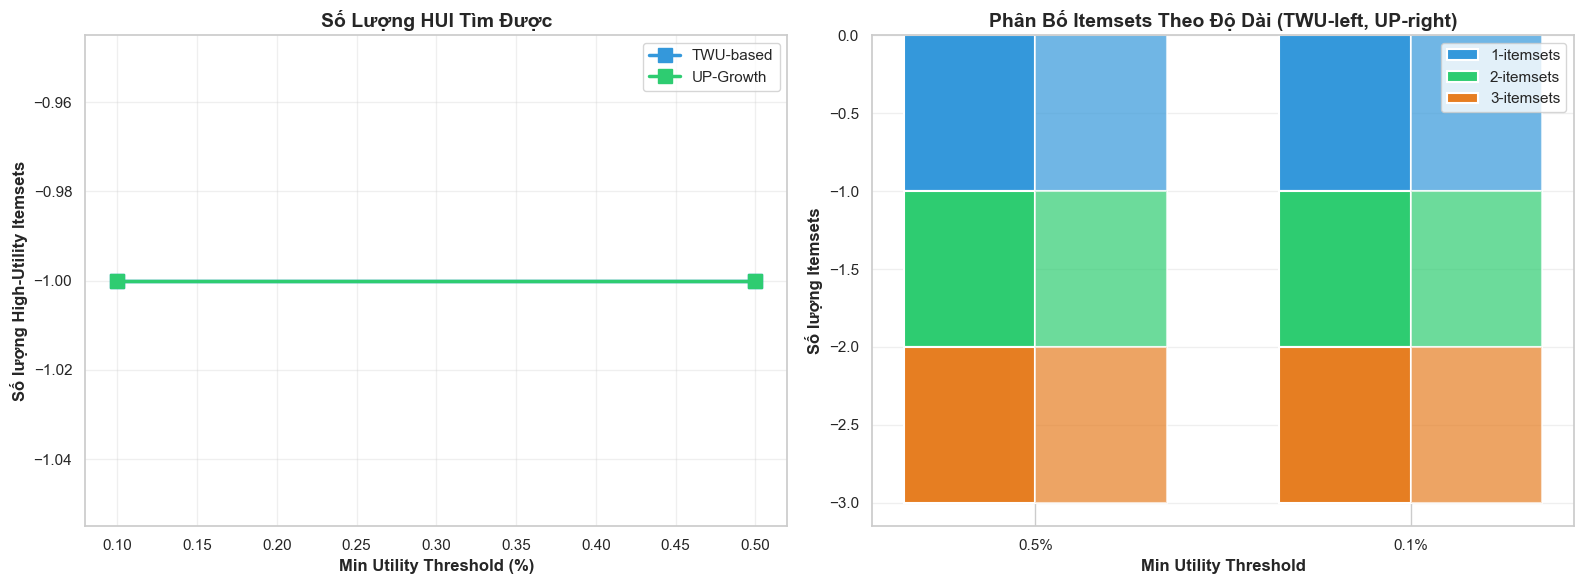

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total itemsets comparison
for algo in df_combined['algorithm'].unique():
    df_algo = df_combined[df_combined['algorithm'] == algo]
    color = COLOR_BLUE if algo == 'TWU-based' else COLOR_GREEN
    ax1.plot(df_algo['min_utility_percent'] * 100, df_algo['n_itemsets'], 
             marker='s', linewidth=2.5, markersize=10, label=algo, color=color)

ax1.set_xlabel('Min Utility Threshold (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Số lượng High-Utility Itemsets', fontsize=12, fontweight='bold')
ax1.set_title('Số Lượng HUI Tìm Được', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Chỉ dùng log scale nếu có dữ liệu > 0
if df_combined['n_itemsets'].min() > 0:
    ax1.set_xscale('log')
    ax1.set_yscale('log')
elif df_combined['n_itemsets'].max() == 0:
    ax1.text(0.5, 0.5, 'Không có HUI\n(Threshold quá cao)', 
             ha='center', va='center', fontsize=12, 
             transform=ax1.transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: Stacked bar - Distribution by length
x_pos = np.arange(len(test_thresholds))
width = 0.35

# TWU-based stacked bars
twu_1 = df_twu_viz['n_1itemsets'].values
twu_2 = df_twu_viz['n_2itemsets'].values
twu_3 = df_twu_viz['n_3itemsets'].values

ax2.bar(x_pos - width/2, twu_1, width, label='1-itemsets', 
        color=COLOR_BLUE, edgecolor='white', linewidth=1.5)
ax2.bar(x_pos - width/2, twu_2, width, bottom=twu_1, label='2-itemsets', 
        color=COLOR_GREEN, edgecolor='white', linewidth=1.5)
ax2.bar(x_pos - width/2, twu_3, width, bottom=twu_1+twu_2, label='3-itemsets', 
        color=COLOR_ORANGE, edgecolor='white', linewidth=1.5)

# UP-Growth stacked bars
up_1 = df_upgrowth_viz['n_1itemsets'].values
up_2 = df_upgrowth_viz['n_2itemsets'].values
up_3 = df_upgrowth_viz['n_3itemsets'].values

ax2.bar(x_pos + width/2, up_1, width, 
        color=COLOR_BLUE, edgecolor='white', linewidth=1.5, alpha=0.7)
ax2.bar(x_pos + width/2, up_2, width, bottom=up_1, 
        color=COLOR_GREEN, edgecolor='white', linewidth=1.5, alpha=0.7)
ax2.bar(x_pos + width/2, up_3, width, bottom=up_1+up_2, 
        color=COLOR_ORANGE, edgecolor='white', linewidth=1.5, alpha=0.7)

ax2.set_xlabel('Min Utility Threshold', fontsize=12, fontweight='bold')
ax2.set_ylabel('Số lượng Itemsets', fontsize=12, fontweight='bold')
ax2.set_title('Phân Bố Itemsets Theo Độ Dài (TWU-left, UP-right)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'{t*100}%' for t in test_thresholds])
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

# Lưu biểu đồ
chart_path = os.path.join(LAB_OUTPUT_DIR, '5.3 So Sanh So Luong Itemsets.png')
plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"✅ Đã lưu biểu đồ: {chart_path}")
plt.show()

## 6. Phân Tích Bổ Sung

Phân tích chi tiết hơn về mối quan hệ giữa Utility và Frequency của các items, đồng thời tìm kiếm những "Hidden Gems" - sản phẩm có giá trị cao nhưng ít được chú ý.

### 6.1 Thống Kê Utility Theo Item

Phân tích thống kê utility của từng item để hiểu sự phân bố giá trị trong dataset.

In [33]:
# Lấy thống kê item
df_item_stats = hui_miner.get_item_statistics()

print("=== Top 20 Items theo Utility ===")
print(df_item_stats.head(20).to_string())

=== Top 20 Items theo Utility ===
                                  item    utility          twu  utility_percent
0                       DOTCOM POSTAGE  206248.77  1286932.670         2.285249
1          PAPER CRAFT , LITTLE BIRDIE  168469.60   168469.600         1.866653
2             REGENCY CAKESTAND 3 TIER  142273.29  1767793.501         1.576397
3   WHITE HANGING HEART T-LIGHT HOLDER  100497.72  1814777.910         1.113521
4                        PARTY BUNTING   93658.53  1398476.010         1.037742
5              JUMBO BAG RED RETROSPOT   86471.34  1918556.040         0.958108
6       MEDIUM CERAMIC TOP STORAGE JAR   80575.63   392325.960         0.892783
7      PAPER CHAIN KIT 50'S CHRISTMAS    62742.54  1396261.030         0.695191
8        ASSORTED COLOUR BIRD ORNAMENT   54756.79   859511.271         0.606709
9                        CHILLI LIGHTS   53336.56   904518.840         0.590972
10      PICNIC BASKET WICKER 60 PIECES   39619.50    39619.500         0.438986
11    

In [34]:
# So sánh với Frequency
# Tính frequency của mỗi item
item_freq = df.groupby(ITEM_COL)[INVOICE_COL].nunique().reset_index()
item_freq.columns = ['item', 'frequency']
item_freq['frequency_percent'] = item_freq['frequency'] / df[INVOICE_COL].nunique() * 100

# Merge với utility stats
df_comparison = df_item_stats.merge(item_freq, on='item', how='left')
df_comparison = df_comparison.sort_values('utility', ascending=False)

print("\n=== So sánh Utility vs Frequency (Top 20 theo Utility) ===")
print(df_comparison[['item', 'utility', 'utility_percent', 'frequency', 'frequency_percent']].head(20).to_string())


=== So sánh Utility vs Frequency (Top 20 theo Utility) ===
                                  item    utility  utility_percent  frequency  frequency_percent
0                       DOTCOM POSTAGE  206248.77         2.285249        706           3.917652
1          PAPER CRAFT , LITTLE BIRDIE  168469.60         1.866653          1           0.005549
2             REGENCY CAKESTAND 3 TIER  142273.29         1.576397       1685           9.350203
3   WHITE HANGING HEART T-LIGHT HOLDER  100497.72         1.113521       2162          11.997114
4                        PARTY BUNTING   93658.53         1.037742       1593           8.839687
5              JUMBO BAG RED RETROSPOT   86471.34         0.958108       1935          10.737473
6       MEDIUM CERAMIC TOP STORAGE JAR   80575.63         0.892783        225           1.248543
7      PAPER CHAIN KIT 50'S CHRISTMAS    62742.54         0.695191       1125           6.242717
8        ASSORTED COLOUR BIRD ORNAMENT   54756.79         0.606709 

### 6.2 Trực Quan Hóa Utility vs Frequency

So sánh trực quan giữa Utility và Frequency để phát hiện các patterns thú vị.

In [35]:
if PLOT_TOP_HUI and 'df_hui' in dir() and df_hui is not None and not df_hui.empty:
    # Plot Top High-Utility Itemsets
    fig, ax = plt.subplots(figsize=(14, 8))
    
    top_hui = df_hui.head(TOP_N).copy()
    colors = sns.color_palette('viridis', len(top_hui))
    
    bars = ax.barh(
        range(len(top_hui)), 
        top_hui['utility'],
        color=colors
    )
    
    ax.set_yticks(range(len(top_hui)))
    ax.set_yticklabels(top_hui['itemset_str'], fontsize=9)
    ax.invert_yaxis()
    
    ax.set_xlabel('Utility (£)', fontsize=12)
    ax.set_title(f'Top {TOP_N} High-Utility Itemsets', fontsize=14, fontweight='bold')
    
    # Thêm giá trị trên thanh
    for i, (bar, utility) in enumerate(zip(bars, top_hui['utility'])):
        ax.text(
            bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
            f'£{utility:,.0f}',
            va='center', fontsize=9
        )
    
    plt.tight_layout()
    
    # Lưu biểu đồ
    chart_path = os.path.join(LAB_OUTPUT_DIR, '6.2 Top High-Utility Itemsets.png')
    plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
    print(f"✅ Đã lưu biểu đồ: {chart_path}")
    plt.show()

In [36]:
if PLOT_COMPARISON:
    # Scatter plot: Utility vs Frequency
    fig = px.scatter(
        df_comparison.head(100),
        x='frequency_percent',
        y='utility_percent',
        hover_name='item',
        size='utility',
        color='utility',
        color_continuous_scale='Viridis',
        title='So sánh Utility vs Frequency của các sản phẩm',
        labels={
            'frequency_percent': 'Frequency (%)',
            'utility_percent': 'Utility (%)',
            'utility': 'Utility (£)'
        }
    )
    
    fig.update_layout(
        width=900,
        height=600,
        font=dict(size=12)
    )
    
    # Lưu biểu đồ
    chart_path = os.path.join(LAB_OUTPUT_DIR, '6.2 Utility vs Frequency Scatter.png')
    try:
        fig.write_image(chart_path)
        print(f"✅ Đã lưu biểu đồ: {chart_path}")
    except Exception as e:
        # Fallback: lưu HTML nếu không có kaleido
        html_path = chart_path.replace('.png', '.html')
        fig.write_html(html_path)
        print(f"✅ Đã lưu biểu đồ HTML: {html_path}")
    fig.show()

✅ Đã lưu biểu đồ HTML: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\6.2 Utility vs Frequency Scatter.html


In [37]:
if PLOT_UTILITY_DISTRIBUTION:
    # Phân phối utility theo độ dài itemset
    if 'df_hui' in dir() and df_hui is not None and not df_hui.empty and 'length' in df_hui.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Số lượng HUI theo độ dài
        length_counts = df_hui['length'].value_counts().sort_index()
        axes[0].bar(length_counts.index, length_counts.values, color='steelblue')
        axes[0].set_xlabel('Độ dài Itemset')
        axes[0].set_ylabel('Số lượng HUI')
        axes[0].set_title('Phân phối High-Utility Itemsets theo độ dài')
        
        # Tổng utility theo độ dài
        utility_by_length = df_hui.groupby('length')['utility'].sum()
        axes[1].bar(utility_by_length.index, utility_by_length.values, color='coral')
        axes[1].set_xlabel('Độ dài Itemset')
        axes[1].set_ylabel('Tổng Utility (£)')
        axes[1].set_title('Tổng Utility theo độ dài Itemset')
        
        plt.tight_layout()
        
        # Lưu biểu đồ
        chart_path = os.path.join(LAB_OUTPUT_DIR, '6.2 Phan Bo HUI theo Do Dai.png')
        plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
        print(f"✅ Đã lưu biểu đồ: {chart_path}")
        plt.show()

### 6.3 Phát Hiện "Hidden Gems"

Tìm các sản phẩm có utility cao nhưng frequency thấp - đây là những sản phẩm có thể bị bỏ lỡ nếu chỉ sử dụng Frequent Pattern Mining.

In [38]:
# Tìm các sản phẩm có utility cao nhưng frequency thấp
# Đây là những "hidden gems" mà Frequent Pattern Mining có thể bỏ lỡ

median_freq = df_comparison['frequency_percent'].median()
median_util = df_comparison['utility_percent'].median()

hidden_gems = df_comparison[
    (df_comparison['frequency_percent'] < median_freq) &
    (df_comparison['utility_percent'] > median_util * 2)
].head(20)

print("=== HIDDEN GEMS: Sản phẩm có Utility cao nhưng Frequency thấp ===")
print("(Những sản phẩm này có thể bị bỏ lỡ nếu chỉ dùng Frequent Pattern Mining)")
print()
if not hidden_gems.empty:
    print(hidden_gems[['item', 'utility', 'utility_percent', 'frequency', 'frequency_percent']].to_string())
else:
    print("Không tìm thấy hidden gems với ngưỡng hiện tại.")

=== HIDDEN GEMS: Sản phẩm có Utility cao nhưng Frequency thấp ===
(Những sản phẩm này có thể bị bỏ lỡ nếu chỉ dùng Frequent Pattern Mining)

                                   item    utility  utility_percent  frequency  frequency_percent
1           PAPER CRAFT , LITTLE BIRDIE  168469.60         1.866653          1           0.005549
10       PICNIC BASKET WICKER 60 PIECES   39619.50         0.438986          2           0.011098
119                          AMAZON FEE   13761.09         0.152474          2           0.011098
162                     Adjust bad debt   11062.06         0.122568          1           0.005549
217                             POSTAGE    8906.94         0.098689         52           0.288552
258         VINTAGE RED KITCHEN CABINET    7625.00         0.084485         35           0.194218
315     LARGE ZINC HEART WALL ORGANISER    6414.61         0.071074         37           0.205316
334                TEA TIME TEA TOWELS     6045.00         0.066979        

### 6.4 Phân Loại Sản Phẩm

Phân loại sản phẩm theo ma trận Utility-Frequency: Stars, Hidden Gems, Volume Drivers.

In [39]:
# Tính support cho các item
n_transactions = df[INVOICE_COL].nunique()

df_comparison['support'] = df_comparison['frequency'] / n_transactions

# Phân loại items
df_comparison['category'] = 'Khác'

# High Utility, High Frequency
df_comparison.loc[
    (df_comparison['utility_percent'] > df_comparison['utility_percent'].quantile(0.75)) &
    (df_comparison['frequency_percent'] > df_comparison['frequency_percent'].quantile(0.75)),
    'category'
] = 'Stars (High Utility + High Freq)'

# High Utility, Low Frequency
df_comparison.loc[
    (df_comparison['utility_percent'] > df_comparison['utility_percent'].quantile(0.75)) &
    (df_comparison['frequency_percent'] <= df_comparison['frequency_percent'].quantile(0.25)),
    'category'
] = 'Hidden Gems (High Utility, Low Freq)'

# Low Utility, High Frequency
df_comparison.loc[
    (df_comparison['utility_percent'] <= df_comparison['utility_percent'].quantile(0.25)) &
    (df_comparison['frequency_percent'] > df_comparison['frequency_percent'].quantile(0.75)),
    'category'
] = 'Volume Drivers (Low Utility, High Freq)'

print("=== Phân loại sản phẩm ===")
print(df_comparison['category'].value_counts())

=== Phân loại sản phẩm ===
category
Khác                                    3210
Stars (High Utility + High Freq)         789
Hidden Gems (High Utility, Low Freq)       8
Name: count, dtype: int64


In [40]:
# Visualize phân loại
fig = px.scatter(
    df_comparison,
    x='frequency_percent',
    y='utility_percent',
    color='category',
    hover_name='item',
    title='Ma trận Utility-Frequency: Phân loại sản phẩm',
    labels={
        'frequency_percent': 'Frequency (%)',
        'utility_percent': 'Utility (%)',
        'category': 'Phân loại'
    },
    color_discrete_map={
        'Stars (High Utility + High Freq)': '#2ecc71',
        'Hidden Gems (High Utility, Low Freq)': '#e74c3c',
        'Volume Drivers (Low Utility, High Freq)': '#3498db',
        'Khác': '#95a5a6'
    }
)

fig.update_layout(
    width=1000,
    height=700,
    font=dict(size=12)
)

# Thêm đường tham chiếu
fig.add_hline(
    y=df_comparison['utility_percent'].quantile(0.75),
    line_dash="dash", line_color="gray",
    annotation_text="75th percentile Utility"
)
fig.add_vline(
    x=df_comparison['frequency_percent'].quantile(0.75),
    line_dash="dash", line_color="gray",
    annotation_text="75th percentile Frequency"
)

# Lưu biểu đồ
chart_path = os.path.join(LAB_OUTPUT_DIR, '6.4 Ma Tran Utility-Frequency.png')
try:
    fig.write_image(chart_path)
    print(f"✅ Đã lưu biểu đồ: {chart_path}")
except Exception as e:
    # Fallback: lưu HTML nếu không có kaleido
    html_path = chart_path.replace('.png', '.html')
    fig.write_html(html_path)
    print(f"✅ Đã lưu biểu đồ HTML: {html_path}")
fig.show()

✅ Đã lưu biểu đồ HTML: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\6.4 Ma Tran Utility-Frequency.html


### 6.5 Lưu Kết Quả Phân Tích

Lưu các kết quả phân tích vào file CSV để sử dụng sau này.

In [41]:
# Lưu High-Utility Itemsets
output_path = os.path.join(project_root, HUI_OUTPUT_PATH)
os.makedirs(os.path.dirname(output_path), exist_ok=True)

if not df_hui.empty:
    # Convert frozenset to string for saving
    df_hui_save = df_hui.copy()
    df_hui_save['itemset'] = df_hui_save['itemset'].apply(lambda x: str(set(x)))
    df_hui_save.to_csv(output_path, index=False)
    print(f"Đã lưu High-Utility Itemsets: {output_path}")
else:
    print("Không có High-Utility Itemsets để lưu.")

Không có High-Utility Itemsets để lưu.


In [42]:
# Lưu thống kê item comparison
comparison_path = os.path.join(project_root, OUTPUT_DIR, 'item_utility_frequency_comparison.csv')
df_comparison.to_csv(comparison_path, index=False)
print(f"Đã lưu so sánh Utility vs Frequency: {comparison_path}")

Đã lưu so sánh Utility vs Frequency: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\data\processed\item_utility_frequency_comparison.csv


## 7. So Sánh Tư Duy: Frequent Pattern Mining vs High-Utility Mining

### 7.1 Khái niệm cốt lõi

| Tiêu chí | Frequent Pattern Mining (FIM) | High-Utility Itemset Mining (HUIM) |
|----------|------------------------------|-----------------------------------|
| **Mục tiêu** | Tìm items **xuất hiện nhiều** | Tìm items **giá trị cao** |
| **Độ đo** | Support = Số lần xuất hiện / Tổng giao dịch | Utility = Σ(Quantity × Price) |
| **Tư duy** | "Bán nhiều = Quan trọng" | "Lợi nhuận cao = Quan trọng" |
| **Ưu điểm** | Downward Closure Property → Cắt tỉa hiệu quả | Phản ánh đúng giá trị kinh doanh |
| **Nhược điểm** | Bỏ lỡ items giá trị cao nhưng ít bán | Phức tạp hơn (cần TWU bound) |

In [43]:
# ============================================================
# 7.0 SETUP ĐỘC LẬP CHO SECTION 7
# ============================================================
# Cell này cho phép chạy Section 7 mà KHÔNG cần chạy lại toàn bộ notebook
# Chỉ cần có file cleaned_uk_data.csv đã được tạo trước đó

import pandas as pd
import matplotlib.pyplot as plt
import os

# ==================== PARAMETERS ====================
INVOICE_COL = "InvoiceNo"
ITEM_COL = "Description"
QUANTITY_COL = "Quantity"
TOTAL_COL = "TotalPrice"

# Màu sắc
COLOR_BLUE = '#3498db'    # Xanh dương - cho Frequency/Volume
COLOR_GREEN = '#2ecc71'   # Xanh lá cây - cho Utility/Profit  
COLOR_ORANGE = '#e67e22'  # Cam - cho Highlights/Important
COLOR_GRAY = '#95a5a6'    # Xám - cho các mục khác

# ==================== LOAD DỮ LIỆU ====================
# Tìm đường dẫn project root
current_dir = os.getcwd()
if 'Lab_PhatTrien_5315' in current_dir:
    project_root = current_dir.split('Lab_PhatTrien_5315')[0].rstrip(os.sep)
else:
    project_root = current_dir

# Đường dẫn dữ liệu
CLEANED_DATA_PATH = os.path.join(project_root, "data", "processed", "cleaned_uk_data.csv")
LAB_OUTPUT_DIR = os.path.join(project_root, "Lab_PhatTrien_5315", "output")

# Tạo thư mục output nếu chưa tồn tại
os.makedirs(LAB_OUTPUT_DIR, exist_ok=True)

# Load dữ liệu - luôn load lại để đảm bảo nhất quán
print("📂 Loading data cho Section 7...")
try:
    # Kiểm tra xem df đã tồn tại và hợp lệ chưa
    if 'df' in globals() and isinstance(df, pd.DataFrame) and len(df) > 0:
        print(f"✅ Sử dụng DataFrame đã có trong memory ({len(df):,} records)")
    else:
        raise NameError("df not found or invalid")
except (NameError, TypeError):
    df = pd.read_csv(CLEANED_DATA_PATH)
    print(f"✅ Loaded {len(df):,} records từ {CLEANED_DATA_PATH}")

# Tính TOTAL_UTILITY - luôn tính lại từ df để đảm bảo chính xác
TOTAL_UTILITY = df[TOTAL_COL].sum()
print(f"✅ TOTAL_UTILITY = £{TOTAL_UTILITY:,.2f}")

print(f"\n📊 Data Summary:")
print(f"   - Số dòng: {len(df):,}")
print(f"   - Số invoices: {df[INVOICE_COL].nunique():,}")
print(f"   - Số items: {df[ITEM_COL].nunique():,}")
print(f"   - Total Utility: £{TOTAL_UTILITY:,.2f}")
print("\n✅ Section 7 sẵn sàng chạy!")

📂 Loading data cho Section 7...
✅ Sử dụng DataFrame đã có trong memory (485,123 records)


✅ TOTAL_UTILITY = £9,025,222.08

📊 Data Summary:
   - Số dòng: 485,123
   - Số invoices: 18,021
   - Số items: 4,007
   - Total Utility: £9,025,222.08

✅ Section 7 sẵn sàng chạy!


In [44]:
# ============================================================
# 7.2 SO SÁNH TRỰC TIẾP: TOP ITEMS THEO FREQUENCY VS UTILITY
# ============================================================

print("="*80)
print("📊 SO SÁNH TƯ DUY: FREQUENT vs HIGH-UTILITY")
print("="*80)

# Tính Frequency cho mỗi item (số lần xuất hiện trong các invoice)
item_frequency = df.groupby(ITEM_COL).agg({
    INVOICE_COL: 'nunique',      # Số invoice chứa item
    QUANTITY_COL: 'sum',         # Tổng quantity
    TOTAL_COL: 'sum'             # Tổng utility
}).reset_index()

item_frequency.columns = ['item', 'frequency', 'total_quantity', 'total_utility']

# Tính support % 
total_invoices = df[INVOICE_COL].nunique()
item_frequency['support_percent'] = item_frequency['frequency'] / total_invoices * 100
item_frequency['utility_percent'] = item_frequency['total_utility'] / TOTAL_UTILITY * 100

# Sắp xếp theo frequency và utility
top_by_frequency = item_frequency.nlargest(20, 'frequency').copy()
top_by_utility = item_frequency.nlargest(20, 'total_utility').copy()

print(f"\n📈 Tổng số items: {len(item_frequency):,}")
print(f"📈 Tổng số invoices: {total_invoices:,}")
print(f"📈 Tổng utility: £{TOTAL_UTILITY:,.2f}")

📊 SO SÁNH TƯ DUY: FREQUENT vs HIGH-UTILITY



📈 Tổng số items: 4,007
📈 Tổng số invoices: 18,021
📈 Tổng utility: £9,025,222.08


In [45]:
# Hiển thị Top 10 theo Frequency
print("\n" + "="*80)
print("🔵 TOP 10 ITEMS THEO FREQUENCY (Tư duy Frequent Pattern Mining)")
print("="*80)
print("→ Đây là những items sẽ được FIM ưu tiên tìm ra")
print("-"*80)

for rank, (_, row) in enumerate(top_by_frequency.head(10).iterrows(), 1):
    print(f"{rank:2}. {row['item'][:50]:<50}")
    print(f"    Frequency: {row['frequency']:,} invoices ({row['support_percent']:.2f}%)")
    print(f"    Utility: £{row['total_utility']:,.2f} ({row['utility_percent']:.4f}%)")
    print()


🔵 TOP 10 ITEMS THEO FREQUENCY (Tư duy Frequent Pattern Mining)
→ Đây là những items sẽ được FIM ưu tiên tìm ra
--------------------------------------------------------------------------------
 1. WHITE HANGING HEART T-LIGHT HOLDER                
    Frequency: 2,162 invoices (12.00%)
    Utility: £100,497.72 (1.1135%)

 2. JUMBO BAG RED RETROSPOT                           
    Frequency: 1,935 invoices (10.74%)
    Utility: £86,471.34 (0.9581%)

 3. REGENCY CAKESTAND 3 TIER                          
    Frequency: 1,685 invoices (9.35%)
    Utility: £142,273.29 (1.5764%)

 4. PARTY BUNTING                                     
    Frequency: 1,593 invoices (8.84%)
    Utility: £93,658.53 (1.0377%)

 5. LUNCH BAG RED RETROSPOT                           
    Frequency: 1,392 invoices (7.72%)
    Utility: £29,007.71 (0.3214%)

 6. ASSORTED COLOUR BIRD ORNAMENT                     
    Frequency: 1,371 invoices (7.61%)
    Utility: £54,756.79 (0.6067%)

 7. SET OF 3 CAKE TINS PANTRY DESIG

In [46]:
# Hiển thị Top 10 theo Utility
print("\n" + "="*80)
print("🟢 TOP 10 ITEMS THEO UTILITY (Tư duy High-Utility Mining)")
print("="*80)
print("→ Đây là những items sẽ được HUIM ưu tiên tìm ra")
print("-"*80)

for rank, (_, row) in enumerate(top_by_utility.head(10).iterrows(), 1):
    print(f"{rank:2}. {row['item'][:50]:<50}")
    print(f"    Utility: £{row['total_utility']:,.2f} ({row['utility_percent']:.4f}%)")
    print(f"    Frequency: {row['frequency']:,} invoices ({row['support_percent']:.2f}%)")
    print()


🟢 TOP 10 ITEMS THEO UTILITY (Tư duy High-Utility Mining)
→ Đây là những items sẽ được HUIM ưu tiên tìm ra
--------------------------------------------------------------------------------
 1. DOTCOM POSTAGE                                    
    Utility: £206,248.77 (2.2852%)
    Frequency: 706 invoices (3.92%)

 2. PAPER CRAFT , LITTLE BIRDIE                       
    Utility: £168,469.60 (1.8667%)
    Frequency: 1 invoices (0.01%)

 3. REGENCY CAKESTAND 3 TIER                          
    Utility: £142,273.29 (1.5764%)
    Frequency: 1,685 invoices (9.35%)

 4. WHITE HANGING HEART T-LIGHT HOLDER                
    Utility: £100,497.72 (1.1135%)
    Frequency: 2,162 invoices (12.00%)

 5. PARTY BUNTING                                     
    Utility: £93,658.53 (1.0377%)
    Frequency: 1,593 invoices (8.84%)

 6. JUMBO BAG RED RETROSPOT                           
    Utility: £86,471.34 (0.9581%)
    Frequency: 1,935 invoices (10.74%)

 7. MEDIUM CERAMIC TOP STORAGE JAR          

In [47]:
# Phân tích sự khác biệt giữa 2 tập top items
top_freq_items = set(top_by_frequency.head(10)['item'])
top_util_items = set(top_by_utility.head(10)['item'])

common_items = top_freq_items & top_util_items
only_in_freq = top_freq_items - top_util_items  # "Volume Drivers"
only_in_util = top_util_items - top_freq_items  # "Hidden Gems"

print("\n" + "="*80)
print("🔍 PHÂN TÍCH SỰ KHÁC BIỆT GIỮA HAI TƯ DUY")
print("="*80)

print(f"\n⭐ STARS (Cả 2 đều chọn): {len(common_items)} items")
print("-"*40)
for item in common_items:
    row = item_frequency[item_frequency['item'] == item].iloc[0]
    print(f"  • {item[:45]}")
    print(f"    Freq: {row['frequency']:,} | Utility: £{row['total_utility']:,.0f}")

print(f"\n🔵 VOLUME DRIVERS (Chỉ FIM chọn - bán nhiều, lời ít): {len(only_in_freq)} items")
print("-"*40)
for item in only_in_freq:
    row = item_frequency[item_frequency['item'] == item].iloc[0]
    print(f"  • {item[:45]}")
    print(f"    Freq: {row['frequency']:,} | Utility: £{row['total_utility']:,.0f}")

print(f"\n💎 HIDDEN GEMS (Chỉ HUIM chọn - bán ít, lời nhiều): {len(only_in_util)} items")
print("-"*40)
for item in only_in_util:
    row = item_frequency[item_frequency['item'] == item].iloc[0]
    print(f"  • {item[:45]}")
    print(f"    Freq: {row['frequency']:,} | Utility: £{row['total_utility']:,.0f}")


🔍 PHÂN TÍCH SỰ KHÁC BIỆT GIỮA HAI TƯ DUY

⭐ STARS (Cả 2 đều chọn): 5 items
----------------------------------------
  • REGENCY CAKESTAND 3 TIER
    Freq: 1,685 | Utility: £142,273
  • WHITE HANGING HEART T-LIGHT HOLDER
    Freq: 2,162 | Utility: £100,498
  • JUMBO BAG RED RETROSPOT
    Freq: 1,935 | Utility: £86,471
  • ASSORTED COLOUR BIRD ORNAMENT
    Freq: 1,371 | Utility: £54,757
  • PARTY BUNTING
    Freq: 1,593 | Utility: £93,659

🔵 VOLUME DRIVERS (Chỉ FIM chọn - bán nhiều, lời ít): 5 items
----------------------------------------
  • HEART OF WICKER SMALL
    Freq: 1,164 | Utility: £31,394
  • SET OF 3 CAKE TINS PANTRY DESIGN 
    Freq: 1,241 | Utility: £29,963
  • LUNCH BAG RED RETROSPOT
    Freq: 1,392 | Utility: £29,008
  • LUNCH BAG  BLACK SKULL.
    Freq: 1,216 | Utility: £20,259
  • NATURAL SLATE HEART CHALKBOARD 
    Freq: 1,219 | Utility: £27,108

💎 HIDDEN GEMS (Chỉ HUIM chọn - bán ít, lời nhiều): 5 items
----------------------------------------
  • DOTCOM POSTAGE
    

✅ Đã lưu biểu đồ: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\7.2 So Sanh FIM vs HUIM.png


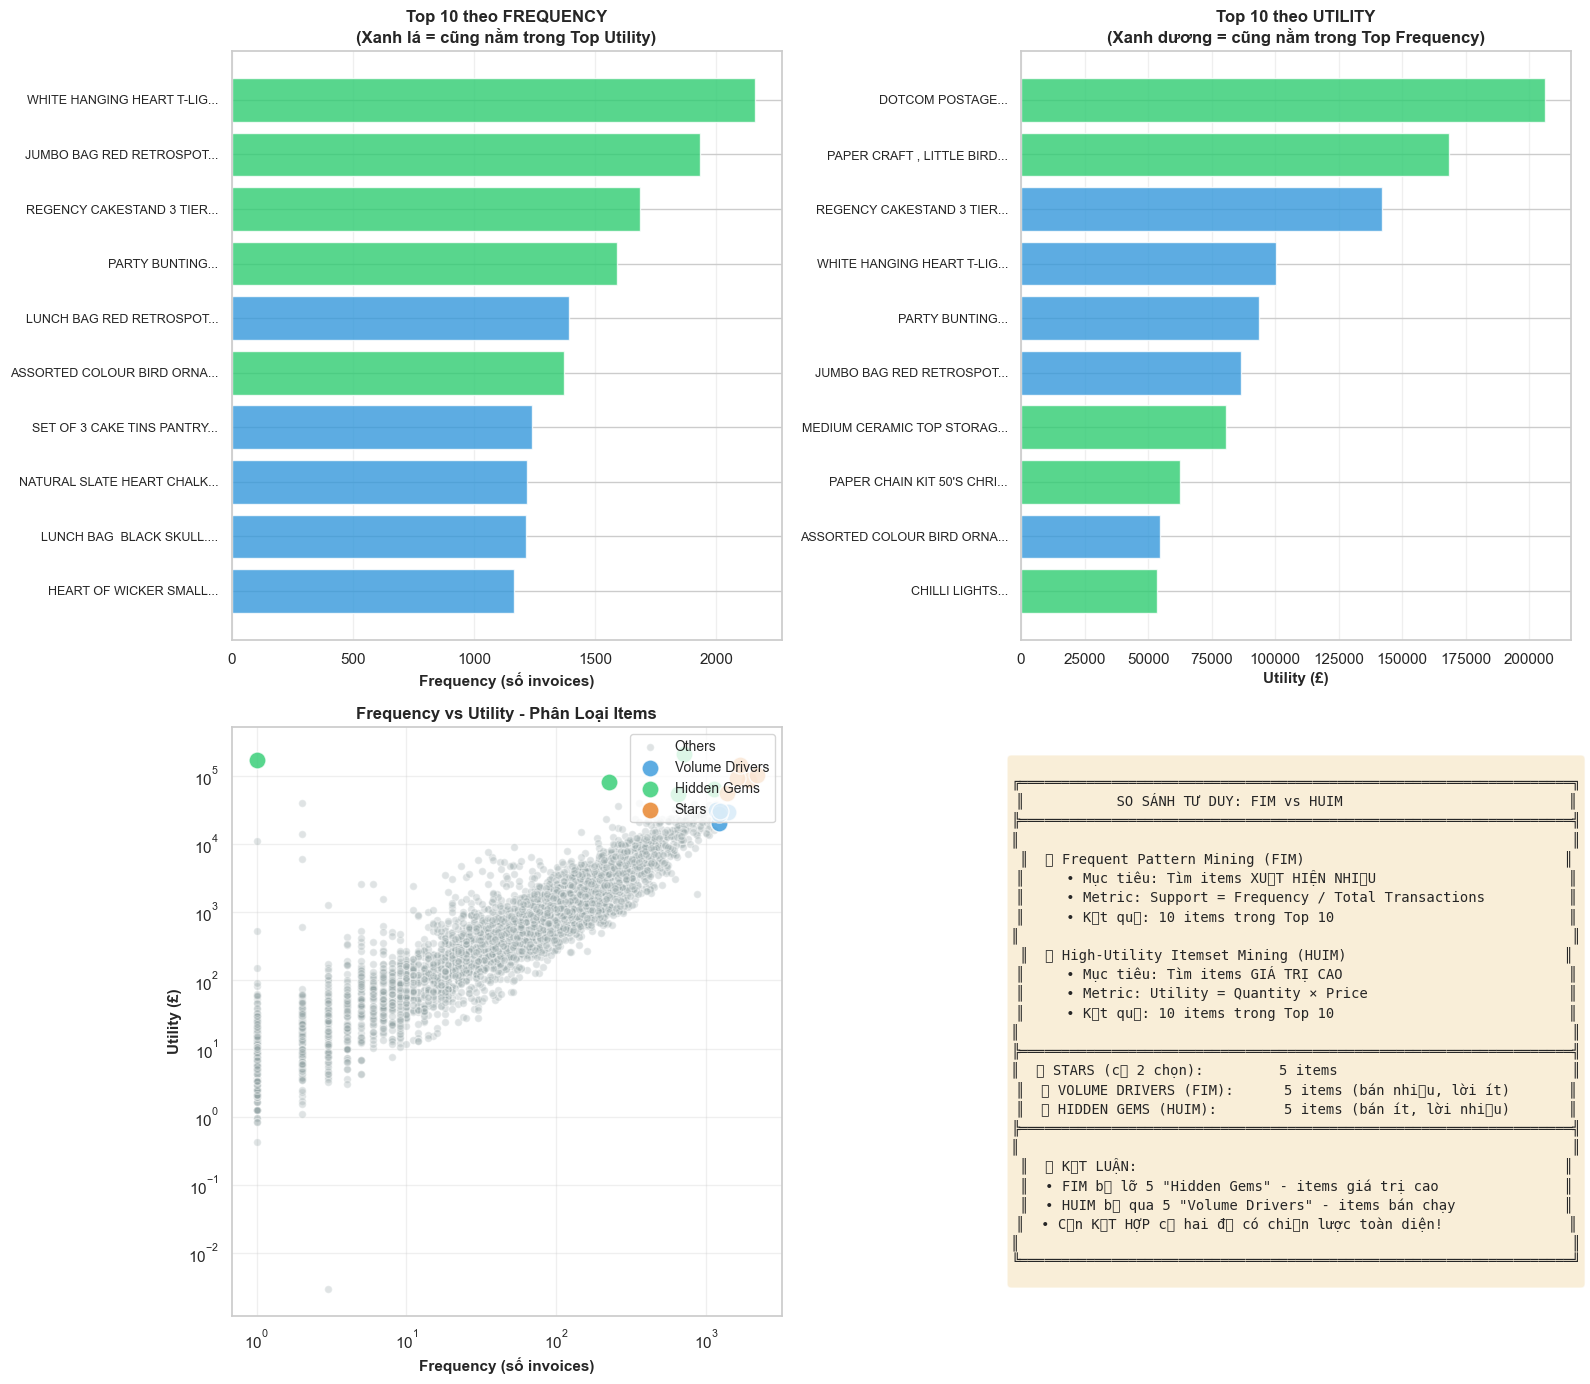

In [48]:
# Visualization: So sánh trực quan
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Bar chart so sánh Top 10 Frequency vs Utility
ax1 = axes[0, 0]
top10_freq = top_by_frequency.head(10).copy()
top10_freq['short_name'] = top10_freq['item'].str[:25] + '...'
colors = [COLOR_GREEN if item in top_util_items else COLOR_BLUE for item in top10_freq['item']]
bars = ax1.barh(range(len(top10_freq)), top10_freq['frequency'], color=colors, alpha=0.8)
ax1.set_yticks(range(len(top10_freq)))
ax1.set_yticklabels(top10_freq['short_name'], fontsize=9)
ax1.invert_yaxis()
ax1.set_xlabel('Frequency (số invoices)', fontsize=11, fontweight='bold')
ax1.set_title('Top 10 theo FREQUENCY\n(Xanh lá = cũng nằm trong Top Utility)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# 2. Bar chart Top 10 Utility
ax2 = axes[0, 1]
top10_util = top_by_utility.head(10).copy()
top10_util['short_name'] = top10_util['item'].str[:25] + '...'
colors = [COLOR_BLUE if item in top_freq_items else COLOR_GREEN for item in top10_util['item']]
bars = ax2.barh(range(len(top10_util)), top10_util['total_utility'], color=colors, alpha=0.8)
ax2.set_yticks(range(len(top10_util)))
ax2.set_yticklabels(top10_util['short_name'], fontsize=9)
ax2.invert_yaxis()
ax2.set_xlabel('Utility (£)', fontsize=11, fontweight='bold')
ax2.set_title('Top 10 theo UTILITY\n(Xanh dương = cũng nằm trong Top Frequency)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Scatter plot: Frequency vs Utility với phân loại
ax3 = axes[1, 0]

# Phân loại items
item_frequency['category'] = 'Others'
item_frequency.loc[item_frequency['item'].isin(common_items), 'category'] = 'Stars'
item_frequency.loc[item_frequency['item'].isin(only_in_freq), 'category'] = 'Volume Drivers'
item_frequency.loc[item_frequency['item'].isin(only_in_util), 'category'] = 'Hidden Gems'

category_colors = {'Stars': COLOR_ORANGE, 'Volume Drivers': COLOR_BLUE, 
                   'Hidden Gems': COLOR_GREEN, 'Others': COLOR_GRAY}

for cat in ['Others', 'Volume Drivers', 'Hidden Gems', 'Stars']:
    subset = item_frequency[item_frequency['category'] == cat]
    alpha = 0.3 if cat == 'Others' else 0.8
    size = 30 if cat == 'Others' else 150
    ax3.scatter(subset['frequency'], subset['total_utility'], 
                c=category_colors[cat], label=cat, alpha=alpha, s=size, edgecolors='white')

ax3.set_xlabel('Frequency (số invoices)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Utility (£)', fontsize=11, fontweight='bold')
ax3.set_title('Frequency vs Utility - Phân Loại Items', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10, loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_xscale('log')
ax3.set_yscale('log')

# 4. Venn-style comparison
ax4 = axes[1, 1]
ax4.axis('off')

# Tạo summary text
summary_text = f"""
╔══════════════════════════════════════════════════════════════════╗
║           SO SÁNH TƯ DUY: FIM vs HUIM                           ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  🔵 Frequent Pattern Mining (FIM)                               ║
║     • Mục tiêu: Tìm items XUẤT HIỆN NHIỀU                       ║
║     • Metric: Support = Frequency / Total Transactions          ║
║     • Kết quả: {len(top_freq_items)} items trong Top 10                            ║
║                                                                  ║
║  🟢 High-Utility Itemset Mining (HUIM)                          ║
║     • Mục tiêu: Tìm items GIÁ TRỊ CAO                           ║
║     • Metric: Utility = Quantity × Price                        ║
║     • Kết quả: {len(top_util_items)} items trong Top 10                            ║
║                                                                  ║
╠══════════════════════════════════════════════════════════════════╣
║  ⭐ STARS (cả 2 chọn):        {len(common_items):2} items                            ║
║  🔵 VOLUME DRIVERS (FIM):     {len(only_in_freq):2} items (bán nhiều, lời ít)       ║
║  💎 HIDDEN GEMS (HUIM):       {len(only_in_util):2} items (bán ít, lời nhiều)       ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  💡 KẾT LUẬN:                                                   ║
║  • FIM bỏ lỡ {len(only_in_util)} "Hidden Gems" - items giá trị cao               ║
║  • HUIM bỏ qua {len(only_in_freq)} "Volume Drivers" - items bán chạy             ║
║  • Cần KẾT HỢP cả hai để có chiến lược toàn diện!               ║
║                                                                  ║
╚══════════════════════════════════════════════════════════════════╝
"""

ax4.text(0.5, 0.5, summary_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='center', horizontalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

# Lưu biểu đồ
chart_path = os.path.join(LAB_OUTPUT_DIR, '7.2 So Sanh FIM vs HUIM.png')
plt.savefig(chart_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"✅ Đã lưu biểu đồ: {chart_path}")
plt.show()

In [49]:
# Bảng so sánh chi tiết với ví dụ cụ thể
print("\n" + "="*80)
print("📋 VÍ DỤ CỤ THỂ: TẠI SAO HAI TƯ DUY KHÁC NHAU?")
print("="*80)

# Tìm một Hidden Gem điển hình
if only_in_util:
    hidden_gem = list(only_in_util)[0]
    hg_data = item_frequency[item_frequency['item'] == hidden_gem].iloc[0]
    
    print(f"\n💎 HIDDEN GEM: '{hidden_gem[:50]}'")
    print(f"   • Frequency: {hg_data['frequency']:,} invoices ({hg_data['support_percent']:.2f}%)")
    print(f"   • Utility: £{hg_data['total_utility']:,.2f} ({hg_data['utility_percent']:.4f}%)")
    print(f"   → FIM sẽ BỎ QUA item này vì support thấp!")
    print(f"   → HUIM sẽ TÌM RA item này vì utility cao!")

# Tìm một Volume Driver điển hình
if only_in_freq:
    vol_driver = list(only_in_freq)[0]
    vd_data = item_frequency[item_frequency['item'] == vol_driver].iloc[0]
    
    print(f"\n🔵 VOLUME DRIVER: '{vol_driver[:50]}'")
    print(f"   • Frequency: {vd_data['frequency']:,} invoices ({vd_data['support_percent']:.2f}%)")
    print(f"   • Utility: £{vd_data['total_utility']:,.2f} ({vd_data['utility_percent']:.4f}%)")
    print(f"   → FIM sẽ TÌM RA item này vì support cao!")
    print(f"   → HUIM có thể BỎ QUA nếu ngưỡng utility cao!")

# Tìm một Star
if common_items:
    star = list(common_items)[0]
    star_data = item_frequency[item_frequency['item'] == star].iloc[0]
    
    print(f"\n⭐ STAR: '{star[:50]}'")
    print(f"   • Frequency: {star_data['frequency']:,} invoices ({star_data['support_percent']:.2f}%)")
    print(f"   • Utility: £{star_data['total_utility']:,.2f} ({star_data['utility_percent']:.4f}%)")
    print(f"   → CẢ HAI đều tìm ra item này!")

print("\n" + "="*80)
print("💡 KẾT LUẬN VỀ SỰ KHÁC BIỆT TƯ DUY")
print("="*80)
print("""
┌─────────────────────────────────────────────────────────────────────────┐
│ FREQUENT PATTERN MINING (FIM)                                          │
│ • Tư duy: "Items bán NHIỀU là quan trọng"                              │
│ • Ưu điểm: Tìm patterns phổ biến, tốt cho cross-selling               │
│ • Nhược điểm: Bỏ lỡ items giá trị cao nhưng ít phổ biến               │
│ • Ứng dụng: Gợi ý sản phẩm, phân tích hành vi mua hàng               │
├─────────────────────────────────────────────────────────────────────────┤
│ HIGH-UTILITY ITEMSET MINING (HUIM)                                     │
│ • Tư duy: "Items có GIÁ TRỊ CAO là quan trọng"                        │
│ • Ưu điểm: Phản ánh đúng giá trị kinh doanh thực sự                   │
│ • Nhược điểm: Có thể bỏ qua items bán chạy nhưng margin thấp          │
│ • Ứng dụng: Tối ưu doanh thu, tìm sản phẩm lợi nhuận cao             │
├─────────────────────────────────────────────────────────────────────────┤
│ KHUYẾN NGHỊ: Kết hợp CẢ HAI để có chiến lược toàn diện!               │
└─────────────────────────────────────────────────────────────────────────┘
""")


📋 VÍ DỤ CỤ THỂ: TẠI SAO HAI TƯ DUY KHÁC NHAU?

💎 HIDDEN GEM: 'DOTCOM POSTAGE'
   • Frequency: 706 invoices (3.92%)
   • Utility: £206,248.77 (2.2852%)
   → FIM sẽ BỎ QUA item này vì support thấp!
   → HUIM sẽ TÌM RA item này vì utility cao!

🔵 VOLUME DRIVER: 'HEART OF WICKER SMALL'
   • Frequency: 1,164 invoices (6.46%)
   • Utility: £31,394.50 (0.3479%)
   → FIM sẽ TÌM RA item này vì support cao!
   → HUIM có thể BỎ QUA nếu ngưỡng utility cao!

⭐ STAR: 'REGENCY CAKESTAND 3 TIER'
   • Frequency: 1,685 invoices (9.35%)
   • Utility: £142,273.29 (1.5764%)
   → CẢ HAI đều tìm ra item này!

💡 KẾT LUẬN VỀ SỰ KHÁC BIỆT TƯ DUY

┌─────────────────────────────────────────────────────────────────────────┐
│ FREQUENT PATTERN MINING (FIM)                                          │
│ • Tư duy: "Items bán NHIỀU là quan trọng"                              │
│ • Ưu điểm: Tìm patterns phổ biến, tốt cho cross-selling               │
│ • Nhược điểm: Bỏ lỡ items giá trị cao nhưng ít phổ biến             

In [50]:
# Lưu bảng so sánh chi tiết
comparison_df = item_frequency[['item', 'frequency', 'support_percent', 
                                 'total_utility', 'utility_percent', 'category']].copy()
comparison_df = comparison_df.sort_values('total_utility', ascending=False)

# Thêm ranking
comparison_df['rank_by_frequency'] = comparison_df['frequency'].rank(ascending=False).astype(int)
comparison_df['rank_by_utility'] = comparison_df['total_utility'].rank(ascending=False).astype(int)
comparison_df['rank_difference'] = comparison_df['rank_by_frequency'] - comparison_df['rank_by_utility']

# Lưu file
comparison_output_path = os.path.join(LAB_OUTPUT_DIR, 'SoSanh_FIM_vs_HUIM.csv')
comparison_df.to_csv(comparison_output_path, index=False, encoding='utf-8-sig')
print(f"✅ Đã lưu bảng so sánh: {comparison_output_path}")

# Hiển thị các items có sự khác biệt lớn nhất
print("\n📊 TOP 10 ITEMS CÓ SỰ KHÁC BIỆT LỚN NHẤT GIỮA RANKING:")
print("-"*80)
extreme_diff = comparison_df.nlargest(10, 'rank_difference', keep='first')
for _, row in extreme_diff.iterrows():
    print(f"• {row['item'][:45]}")
    print(f"  Rank Freq: #{int(row['rank_by_frequency'])} | Rank Util: #{int(row['rank_by_utility'])} | Diff: {int(row['rank_difference'])}")

✅ Đã lưu bảng so sánh: E:\dnu.khmt.1701.1771040029@gmail.com\ShoppingCartAnalysis_FrequentPatternTree\Lab_PhatTrien_5315\output\SoSanh_FIM_vs_HUIM.csv

📊 TOP 10 ITEMS CÓ SỰ KHÁC BIỆT LỚN NHẤT GIỮA RANKING:
--------------------------------------------------------------------------------


• PAPER CRAFT , LITTLE BIRDIE
  Rank Freq: #3920 | Rank Util: #2 | Diff: 3918
• Adjust bad debt
  Rank Freq: #3920 | Rank Util: #163 | Diff: 3757
• PICNIC BASKET WICKER 60 PIECES
  Rank Freq: #3762 | Rank Util: #11 | Diff: 3751
• AMAZON FEE
  Rank Freq: #3762 | Rank Util: #120 | Diff: 3642
• TEA TIME TEA TOWELS 
  Rank Freq: #3762 | Rank Util: #335 | Diff: 3427
• HALL CABINET WITH 3 DRAWERS
  Rank Freq: #3475 | Rank Util: #765 | Diff: 2710
• UTILTY CABINET WITH HOOKS
  Rank Freq: #3410 | Rank Util: #761 | Diff: 2649
• POTTING SHED CANDLE CITRONELLA
  Rank Freq: #3640 | Rank Util: #1296 | Diff: 2344
• CHEST NATURAL WOOD 20 DRAWERS
  Rank Freq: #3117 | Rank Util: #817 | Diff: 2300
• RUSTIC  SEVENTEEN DRAWER SIDEBOARD
  Rank Freq: #2721 | Rank Util: #445 | Diff: 2276


### 7.4 Đề xuất Kinh Doanh

Dựa trên kết quả phân loại items:

1. **Hidden Gems**: Các sản phẩm có utility cao nhưng frequency thấp - đây là những sản phẩm có thể bị bỏ lỡ nếu chỉ dùng Frequent Pattern Mining.

2. **Volume Drivers**: Các sản phẩm bán chạy nhưng margin thấp - quan trọng để duy trì traffic nhưng không phải nguồn lợi nhuận chính.

3. **Stars**: Sản phẩm vừa bán chạy vừa sinh lời cao - cần ưu tiên quảng bá và đảm bảo inventory.

**Chiến lược:**

- **Với Hidden Gems**: Tăng visibility, marketing để chuyển thành Stars
- **Với Volume Drivers**: Sử dụng làm sản phẩm "loss leader" để thu hút khách
- **Với Stars**: Đảm bảo inventory, tạo bundle deals
- **Cross-selling**: Kết hợp High-Utility Itemsets để gợi ý sản phẩm tối ưu doanh thu

---

## Tài liệu tham khảo

1. Liu, Y., Liao, W., & Choudhary, A. (2005). A two-phase algorithm for fast discovery of high utility itemsets. *PAKDD 2005*.

2. Fournier-Viger, P., et al. (2014). FHM: Faster high-utility itemset mining using estimated utility co-occurrence pruning. *ISMIS 2014*.

3. Gan, W., et al. (2021). A survey of utility-oriented pattern mining. *IEEE Transactions on Knowledge and Data Engineering*.

4. Thư viện SPMF: http://www.philippe-fournier-viger.com/spmf/ (Java library for pattern mining)